##gesturon v_1.2

 This Python 3 environment comes with many helpful analytics libraries installed
 It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
 For example, here's several helpful packages to load
 Input data files are available in the read-only "../input/" directory
 For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
 You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install kagglehub
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 20.1 MB/s eta 0:00:00


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("soumicksarker/ipn-hand-dataset")

print("Path to dataset files:", path)

!cp -R /root/.cache/kagglehub/datasets/soumicksarker/ipn-hand-dataset/versions/7 /content

100%|██████████| 4.61G/4.61G [01:01<00:00, 80.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/soumicksarker/ipn-hand-dataset/versions/7


In [ ]:
import pandas as pd

In [ ]:
metadata = pd.read_excel('/content/7/annotations/annotations/metadata.xlsx')
metadata.head()

,Video Name,Frames,Sex,Hand,Background,Illumination,People in Scene,Background Motion,Set
0,1CM1_4_R__229,3751,W,Right,Clutter,Stable,Single,Static,train
1,1CM1_4_R__230,3684,W,Right,Clutter,Stable,Single,Static,train
2,1CM1_4_R__231,3747,W,Right,Clutter,Stable,Single,Static,train
3,1CM1_4_R__232,3858,W,Right,Clutter,Stable,Single,Static,train
4,1CM42_11_R__205,3686,M,Right,Plain,Stable,Single,Static,train


In [ ]:
file = open('/content/7/annotations/annotations/class_details.txt')
text = file.read().split('\n')
label_id_dict = dict()
for row in text:
    info = row.split('\t')[:3]
    label_id_dict[info[0]] = info[1:]
label_id_dict

{'id': ['Label', 'Gesture'],
 '1': ['D0X', 'Non-gesture'],
 '2': ['B0A', 'Pointing with one finger'],
 '3': ['B0B', 'Pointing with two fingers'],
 '4': ['G01', 'Click with one finger'],
 '5': ['G02', 'Click with two fingers'],
 '6': ['G03', 'Throw up'],
 '7': ['G04', 'Throw down'],
 '8': ['G05', 'Throw left'],
 '9': ['G06', 'Throw right'],
 '10': ['G07', 'Open twice'],
 '11': ['G08', 'Double click with one finger'],
 '12': ['G09', 'Double click with two fingers'],
 '13': ['G10', 'Zoom in'],
 '14': ['G11', 'Zoom out'],
 '': []}

In [ ]:
train_annotations =  pd.read_csv("/content/7/annotations/annotations/Annot_TrainList.txt",
                                names=["video","label","id","t_start","t_end","frames"])

train_annotations.head()

,video,label,id,t_start,t_end,frames
0,1CM1_4_R__229,D0X,1,1,17,17
1,1CM1_4_R__229,G11,14,18,55,38
2,1CM1_4_R__229,B0B,3,56,284,229
3,1CM1_4_R__229,G04,7,285,308,24
4,1CM1_4_R__229,B0B,3,309,502,194


In [ ]:
test_annotations =  pd.read_csv("/content/7/annotations/annotations/Annot_TestList.txt",
                                names=["video","label","id","t_start","t_end","frames"])

test_annotations.head()

,video,label,id,t_start,t_end,frames
0,1CM1_1_R__217,D0X,1,1,28,28
1,1CM1_1_R__217,G10,13,29,72,44
2,1CM1_1_R__217,B0A,2,73,235,163
3,1CM1_1_R__217,G07,10,236,260,25
4,1CM1_1_R__217,B0A,2,261,448,188


In [ ]:
annotations = pd.read_csv("/content/7/annotations/annotations/Annot_List.txt")
annotations

,video,label,id,t_start,t_end,frames
0,1CM1_4_R__229,D0X,1,1,17,17
1,1CM1_4_R__229,G11,14,18,55,38
2,1CM1_4_R__229,B0B,3,56,284,229
3,1CM1_4_R__229,G04,7,285,308,24
4,1CM1_4_R__229,B0B,3,309,502,194
...,...,...,...,...,...,...
5644,4CM11_24_L__64,D0X,1,3604,3623,20
5645,4CM11_24_L__64,B0A,2,3624,3818,195
5646,4CM11_24_L__64,D0X,1,3819,3830,12
5647,4CM11_24_L__64,G04,7,3831,3881,51


In [ ]:
import os
import json

In [ ]:
class_details = {}
with open("/content/7/annotations/annotations/class_details.txt", "r") as f:
  next(f)
  for line in f:
    parts = line.strip().split("\t")
    class_id, label, description = parts[0],parts[1],parts[2]
    class_details[label] = {"id": int(class_id),"description":description}

In [ ]:
class_details

{'D0X': {'id': 1, 'description': 'Non-gesture'},
 'B0A': {'id': 2, 'description': 'Pointing with one finger'},
 'B0B': {'id': 3, 'description': 'Pointing with two fingers'},
 'G01': {'id': 4, 'description': 'Click with one finger'},
 'G02': {'id': 5, 'description': 'Click with two fingers'},
 'G03': {'id': 6, 'description': 'Throw up'},
 'G04': {'id': 7, 'description': 'Throw down'},
 'G05': {'id': 8, 'description': 'Throw left'},
 'G06': {'id': 9, 'description': 'Throw right'},
 'G07': {'id': 10, 'description': 'Open twice'},
 'G08': {'id': 11, 'description': 'Double click with one finger'},
 'G09': {'id': 12, 'description': 'Double click with two fingers'},
 'G10': {'id': 13, 'description': 'Zoom in'},
 'G11': {'id': 14, 'description': 'Zoom out'}}

In [ ]:
gesture_frames = {details["description"]: [] for details in class_details.values()}

In [ ]:
gesture_frames

{'Non-gesture': [],
 'Pointing with one finger': [],
 'Pointing with two fingers': [],
 'Click with one finger': [],
 'Click with two fingers': [],
 'Throw up': [],
 'Throw down': [],
 'Throw left': [],
 'Throw right': [],
 'Open twice': [],
 'Double click with one finger': [],
 'Double click with two fingers': [],
 'Zoom in': [],
 'Zoom out': []}

In [ ]:
import pandas as pd

# Load gesture descriptions from class_details.txt
class_details = {}
with open("/content/7/annotations/annotations/class_details.txt", "r") as f:
    next(f)  # Skip the header
    for line in f:
        parts = line.strip().split("\t")
        class_id, label, description = parts[0], parts[1], parts[2]
        class_details[label] = description  # Map label to description

# Initialize a list to store DataFrame rows
data = []

with open("/content/7/annotations/annotations/Annot_TrainList.txt", "r") as annotation_file:
    for line in annotation_file:
        # Parse annotation details
        parts = line.strip().split(",")
        video_name, label, gesture_id, t_start, t_end, frames = parts
        t_start, t_end = int(t_start), int(t_end)

        # Map the label to its description
        description = class_details.get(label, "Unknown Gesture")

        # Generate frame indices
        frame_indices = list(range(t_start, t_end + 1))  # List of frame indices

        # Add a row to the DataFrame
        data.append({
            "Label": description,  # Use the description here
            "Video_ID": video_name,
            "Frames": frame_indices  # Store frame indices or names here
        })

# Create the DataFrame
df = pd.DataFrame(data)

# Save or inspect the DataFrame
df.to_csv("gesture_frames_with_descriptions.csv", index=False)
print(df)


                          Label       Video_ID  \
0                   Non-gesture  1CM1_4_R__229   
1                      Zoom out  1CM1_4_R__229   
2     Pointing with two fingers  1CM1_4_R__229   
3                    Throw down  1CM1_4_R__229   
4     Pointing with two fingers  1CM1_4_R__229   
...                         ...            ...   
4034   Pointing with one finger  4CM11_7_R__36   
4035                 Throw down  4CM11_7_R__36   
4036   Pointing with one finger  4CM11_7_R__36   
4037                 Throw left  4CM11_7_R__36   
4038                Non-gesture  4CM11_7_R__36   

                                                 Frames  
0     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  
1     [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...  
2     [56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6...  
3     [285, 286, 287, 288, 289, 290, 291, 292, 293, ...  
4     [309, 310, 311, 312, 313, 314, 315, 316, 317, ...  
...                                                

In [ ]:
import pandas as pd

# Load gesture descriptions from class_details.txt
class_details = {}
with open("/content/7/annotations/annotations/class_details.txt", "r") as f:
    next(f)  # Skip the header
    for line in f:
        parts = line.strip().split("\t")
        class_id, label, description = parts[0], parts[1], parts[2]
        class_details[label] = description  # Map label to description

# Initialize a list to store DataFrame rows
data = []

with open("/content/7/annotations/annotations/Annot_TestList.txt", "r") as annotation_file:
    for line in annotation_file:
        # Parse annotation details
        parts = line.strip().split(",")
        video_name, label, gesture_id, t_start, t_end, frames = parts
        t_start, t_end = int(t_start), int(t_end)

        # Map the label to its description
        description = class_details.get(label, "Unknown Gesture")

        # Generate frame indices
        frame_indices = list(range(t_start, t_end + 1))  # List of frame indices

        # Add a row to the DataFrame
        data.append({
            "Label": description,  # Use the description here
            "Video_ID": video_name,
            "Frames": frame_indices  # Store frame indices or names here
        })

# Create the DataFrame
df = pd.DataFrame(data)

# Save or inspect the DataFrame
df.to_csv("gesture_frames_Test.csv", index=False)
print(df)

                         Label        Video_ID  \
0                  Non-gesture   1CM1_1_R__217   
1                      Zoom in   1CM1_1_R__217   
2     Pointing with one finger   1CM1_1_R__217   
3                   Open twice   1CM1_1_R__217   
4     Pointing with one finger   1CM1_1_R__217   
...                        ...             ...   
1605               Non-gesture  4CM11_24_L__64   
1606  Pointing with one finger  4CM11_24_L__64   
1607               Non-gesture  4CM11_24_L__64   
1608                Throw down  4CM11_24_L__64   
1609               Non-gesture  4CM11_24_L__64   

                                                 Frames  
0     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  
1     [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4...  
2     [73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 8...  
3     [236, 237, 238, 239, 240, 241, 242, 243, 244, ...  
4     [261, 262, 263, 264, 265, 266, 267, 268, 269, ...  
...                                                

In [ ]:
df_train = pd.read_csv('/content/gesture_frames_Train.csv')
df_test = pd.read_csv('/content/gesture_frames_Test.csv')

In [ ]:
df_train

,Label,Video_ID,Frames
0,Non-gesture,1CM1_4_R__229,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Zoom out,1CM1_4_R__229,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2..."
2,Pointing with two fingers,1CM1_4_R__229,"[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6..."
3,Throw down,1CM1_4_R__229,"[285, 286, 287, 288, 289, 290, 291, 292, 293, ..."
4,Pointing with two fingers,1CM1_4_R__229,"[309, 310, 311, 312, 313, 314, 315, 316, 317, ..."
...,...,...,...
4034,Pointing with one finger,4CM11_7_R__36,"[3333, 3334, 3335, 3336, 3337, 3338, 3339, 334..."
4035,Throw down,4CM11_7_R__36,"[3574, 3575, 3576, 3577, 3578, 3579, 3580, 358..."
4036,Pointing with one finger,4CM11_7_R__36,"[3689, 3690, 3691, 3692, 3693, 3694, 3695, 369..."
4037,Throw left,4CM11_7_R__36,"[3892, 3893, 3894, 3895, 3896, 3897, 3898, 389..."


In [ ]:
df_train_smol = df_train.head()
df_train_smol

,Label,Video_ID,Frames
0,Non-gesture,1CM1_4_R__229,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Zoom out,1CM1_4_R__229,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2..."
2,Pointing with two fingers,1CM1_4_R__229,"[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6..."
3,Throw down,1CM1_4_R__229,"[285, 286, 287, 288, 289, 290, 291, 292, 293, ..."
4,Pointing with two fingers,1CM1_4_R__229,"[309, 310, 311, 312, 313, 314, 315, 316, 317, ..."


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import mediapipe as mp

video_dir = '/content/7/videos/videos'
output_dir = '/content'
os.makedirs(output_dir, exist_ok=True)

# Assuming df_train_smol is the DataFrame
# Example: df_train_smol = pd.read_csv('gesture_frames_with_descriptions.csv')

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize PCA for dimensionality reduction
pca = PCA(n_components=10)  # Reduce to 10 dimensions

# To store flow vectors
flow_vectors = []
labels = []

for index, row in df_train_smol.iterrows():
    label = row['Label']
    video_id = row['Video_ID']
    frame_indices = eval(row['Frames'])

    video_path = os.path.join(video_dir, f"{video_id}.avi")
    if not os.path.exists(video_path):
        print(f"Video file not found: {video_path}")
        continue

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        continue

    # To store landmarks for the frames in the current gesture
    gesture_landmarks = []

    for frame_idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx - 1)
        ret, frame = cap.read()
        if not ret:
            print(f"Error reading frame {frame_idx} from video {video_id}")
            continue

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(frame_rgb)

        if results.multi_hand_landmarks:
            # Use the first detected hand
            hand_landmarks = results.multi_hand_landmarks[0]
            landmarks = [(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark]
            gesture_landmarks.append(landmarks)

    cap.release()

    # Calculate flow vectors if there are enough landmarks
    if len(gesture_landmarks) > 1:
        # Convert to NumPy array: Shape (T, 21, 3)
        gesture_landmarks = np.array(gesture_landmarks)

        # Compute temporal differences: Shape (T-1, 21, 3)
        temporal_diff = np.diff(gesture_landmarks, axis=0)

        # Flatten each frame's differences into a 1D vector: Shape (T-1, 63)
        flow_vector = temporal_diff.reshape(temporal_diff.shape[0], -1)

        # Apply PCA to reduce dimensions
        flow_vector_reduced = pca.fit_transform(flow_vector)  # Shape: (T-1, 10)

        # Save the reduced flow vector and label
        flow_vectors.append(flow_vector_reduced)
        labels.append(label)

hands.close()

# Save flow vectors to a file
flow_vectors_output = {
    "labels": labels,
    "flow_vectors": flow_vectors
}
np.save(os.path.join(output_dir, "flow_vectors.npy"), flow_vectors_output)
print("Flow vectors have been calculated, reduced, and saved to {output_dir}")


Error reading frame 15 from video 1CM1_4_R__229
Error reading frame 16 from video 1CM1_4_R__229
Error reading frame 17 from video 1CM1_4_R__229
Error reading frame 25 from video 1CM1_4_R__229
Error reading frame 26 from video 1CM1_4_R__229
Flow vectors have been calculated, reduced, and saved to {output_dir}


In [ ]:
import numpy as np

# Path to the saved NumPy file
npy_file_path = "/content/flow_vectors.npy"

# Load the file
flow_vectors_data = np.load(npy_file_path, allow_pickle=True).item()

# Extract labels and flow vectors
labels = flow_vectors_data["labels"]
flow_vectors = flow_vectors_data["flow_vectors"]

print("Loaded labels:", labels[:5])  # Print first 5 labels
print("Flow vector shape for first gesture:", flow_vectors[1].shape)  # Shape of first flow vector


Loaded labels: ['Non-gesture', 'Zoom out', 'Pointing with two fingers', 'Throw down', 'Pointing with two fingers']
Flow vector shape for first gesture: (34, 10)


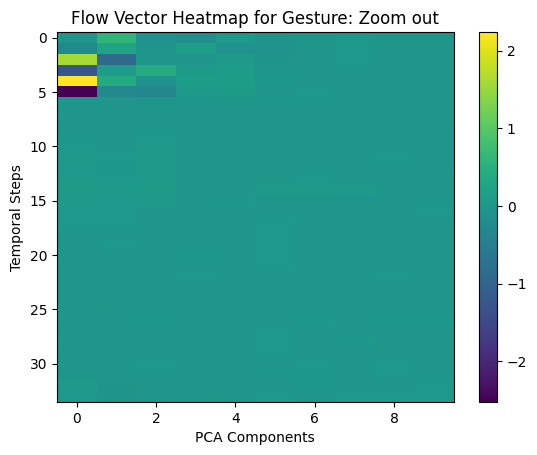

In [ ]:
import matplotlib.pyplot as plt

# Visualize the first flow vector as a heatmap
gesture_index = 1
flow_vector = flow_vectors[gesture_index]  # Shape: (T-1, PCA_components)

plt.imshow(flow_vector, cmap="viridis", aspect="auto")
plt.colorbar()
plt.title(f"Flow Vector Heatmap for Gesture: {labels[gesture_index]}")
plt.xlabel("PCA Components")
plt.ylabel("Temporal Steps")
plt.show()


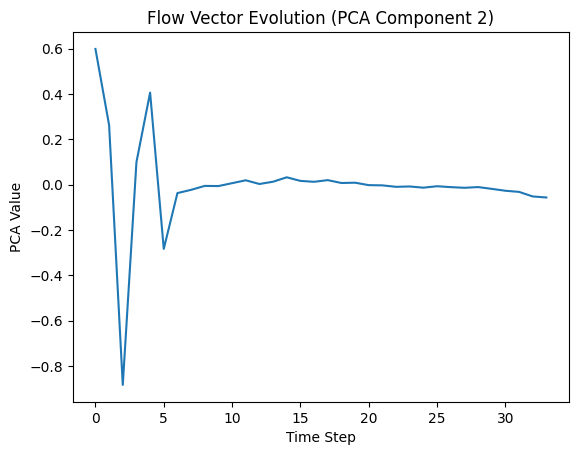

In [ ]:
# Plot the first PCA component over time for the first gesture
pca_component_index = 1
plt.plot(flow_vector[:, pca_component_index])
plt.title(f"Flow Vector Evolution (PCA Component {pca_component_index + 1})")
plt.xlabel("Time Step")
plt.ylabel("PCA Value")
plt.show()


In [ ]:
import pandas as pd

# Convert the first flow vector to a DataFrame
df = pd.DataFrame(flow_vector, columns=[f"PCA_{i+1}" for i in range(flow_vector.shape[1])])

print(df.head())  # View the first few rows of the flow vector

      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0 -0.043860  0.598207 -0.119450 -0.187257  0.058923 -0.056308  0.002554   
1 -0.254711  0.261980 -0.063652  0.163108 -0.105892 -0.073159  0.006961   
2  1.599171 -0.882799 -0.005510 -0.023838  0.039448 -0.054891  0.005586   
3 -1.246804  0.098947  0.404786  0.072293  0.095073 -0.025324 -0.002522   
4  2.240548  0.405574 -0.121708  0.139924  0.093397  0.019406  0.006799   

      PCA_8     PCA_9    PCA_10  
0  0.010492 -0.004853  0.005732  
1  0.009018 -0.004914  0.007644  
2  0.010418 -0.006406  0.002230  
3  0.005034 -0.000596  0.000749  
4 -0.000620  0.002688 -0.009412  


In [ ]:
unique_labels = set(labels)
print("Unique gesture labels:", unique_labels)

Unique gesture labels: {'Throw down', 'Pointing with two fingers', 'Non-gesture', 'Zoom out'}


##EDA ON Train and Test

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4039 entries, 0 to 4038
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Label     4039 non-null   object
 1   Video_ID  4039 non-null   object
 2   Frames    4039 non-null   object
dtypes: object(3)
memory usage: 94.8+ KB


In [ ]:
print(df_train.describe())

              Label       Video_ID  \
count          4039           4039   
unique           14            148   
top     Non-gesture  1CV12_8_R__88   
freq            922             43   

                                                   Frames  
count                                                4039  
unique                                               3957  
top     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  
freq                                                    6  


Label
Non-gesture                      922
Pointing with one finger         745
Pointing with two fingers        743
Throw down                       149
Zoom out                         148
Throw left                       148
Throw up                         148
Click with two fingers           148
Double click with one finger     148
Throw right                      148
Zoom in                          148
Double click with two fingers    148
Open twice                       148
Click with one finger            148
Name: count, dtype: int64


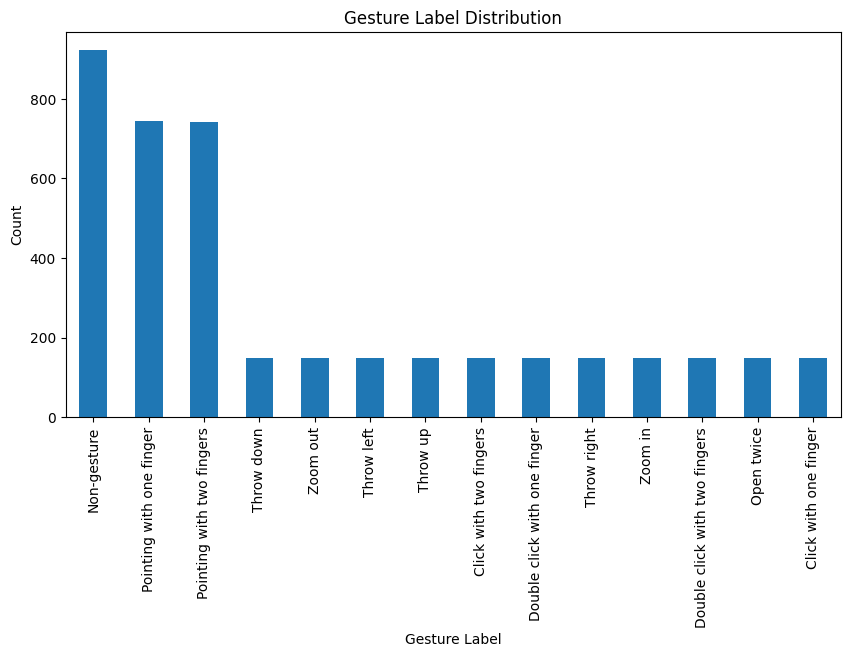

In [ ]:
label_counts = df_train["Label"].value_counts()
print(label_counts)

# Plot the distribution
import matplotlib.pyplot as plt

label_counts.plot(kind="bar", figsize=(10, 5), title="Gesture Label Distribution")
plt.xlabel("Gesture Label")
plt.ylabel("Count")
plt.show()

count    4039.000000
mean      145.657093
std       105.971996
min         9.000000
25%        56.000000
50%       114.000000
75%       218.000000
max       970.000000
Name: Num_Frames, dtype: float64


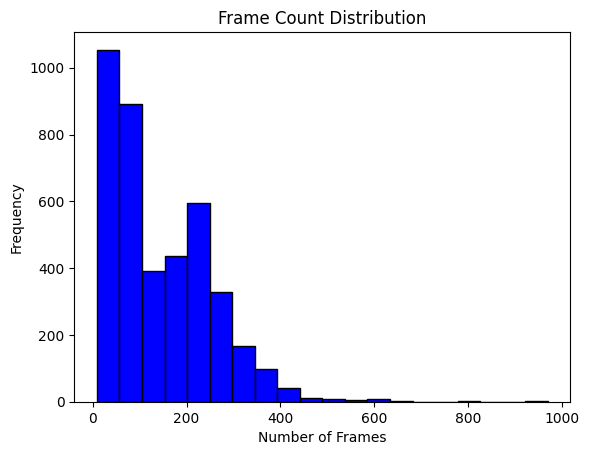

In [ ]:
df_train["Num_Frames"] = df_train["Frames"].apply(lambda x: len(eval(x)))  # Convert 'Frames' string to a list and calculate length

# Summary statistics for frame counts
print(df_train["Num_Frames"].describe())

# Plot frame count distribution
plt.hist(df_train["Num_Frames"], bins=20, color="blue", edgecolor="black")
plt.title("Frame Count Distribution")
plt.xlabel("Number of Frames")
plt.ylabel("Frequency")
plt.show()

Video_ID
1CV12_8_R__88      43
4CM11_11_R__3      43
4CM11_23_R__28     43
1CV12_8_R__87      43
1CV12_8_R__86      43
                   ..
1CV12_23_R__118    25
1CM42_4_R__185     25
1CM42_4_R__188     25
1CV12_23_R__120    25
1CV12_23_R__119    25
Name: count, Length: 148, dtype: int64


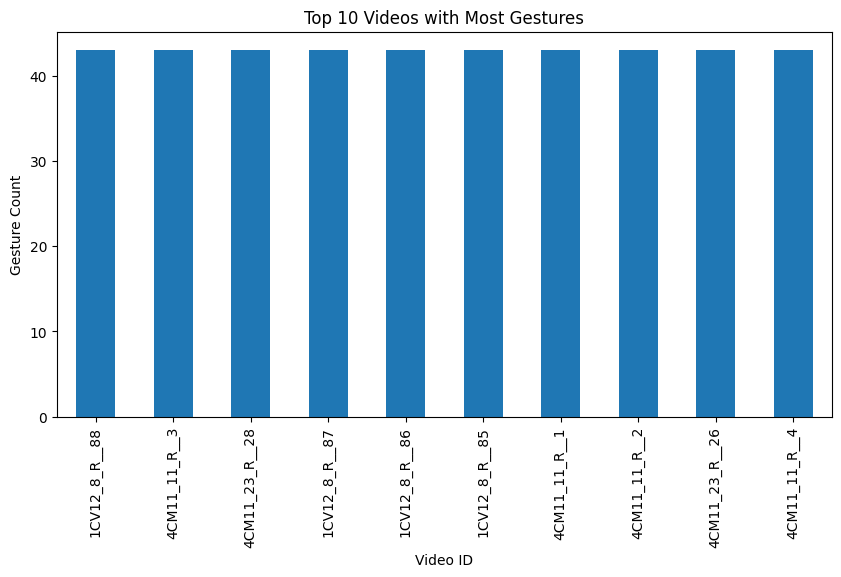

In [ ]:
# Count gestures by video
video_counts = df_train["Video_ID"].value_counts()

# Print the counts
print(video_counts)

# Plot the video-wise distribution
video_counts.head(10).plot(kind="bar", figsize=(10, 5), title="Top 10 Videos with Most Gestures")
plt.xlabel("Video ID")
plt.ylabel("Gesture Count")
plt.show()


Using Stratified sampling to maintain the class balance in the sample distribution

In [ ]:
# Stratified sampling based on 'Label'
sampled_df = df_train.groupby("Label").apply(lambda x: x.sample(frac=0.05))  # 20% of each gesture
sampled_df = sampled_df.reset_index(drop=True)

# Save the sampled dataset
#sampled_df.to_csv("sampled_gesture_frames_Test.csv", index=False)
print(f"Sampled dataset saved with {len(sampled_df)} rows.")
sampled_df

Sampled dataset saved with 197 rows.


<ipython-input-26-3490253d920d>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df_train.groupby("Label").apply(lambda x: x.sample(frac=0.05))  # 20% of each gesture


,Label,Video_ID,Frames
0,Click with one finger,4CM11_1_R__16,"[1417, 1418, 1419, 1420, 1421, 1422, 1423, 142..."
1,Click with one finger,1CM42_18_R__177,"[2882, 2883, 2884, 2885, 2886, 2887, 2888, 288..."
2,Click with one finger,1CM42_26_R__173,"[3121, 3122, 3123, 3124, 3125, 3126, 3127, 312..."
3,Click with one finger,1CM42_26_R__174,"[78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 8..."
4,Click with one finger,4CM11_17_R__15,"[952, 953, 954, 955, 956, 957, 958, 959, 960, ..."
...,...,...,...
192,Zoom out,1CM42_7_L__202,"[2535, 2536, 2537, 2538, 2539, 2540, 2541, 254..."
193,Zoom out,1CV12_22_R__114,"[2979, 2980, 2981, 2982, 2983, 2984, 2985, 298..."
194,Zoom out,4CM11_2_R__40,"[569, 570, 571, 572, 573, 574, 575, 576, 577, ..."
195,Zoom out,4CM11_29_R__59,"[337, 338, 339, 340, 341, 342, 343, 344, 345, ..."


In [ ]:
# Stratified sampling based on 'Label' for test dataset
sampled_test_df = df_test.groupby("Label").apply(lambda x: x.sample(frac=0.05))  # 5% of each gesture
sampled_test_df = sampled_test_df.reset_index(drop=True)

# Save the sampled test dataset
# sampled_test_df.to_csv("sampled_gesture_frames_Test.csv", index=False)
print(f"Sampled test dataset saved with {len(sampled_test_df)} rows.")

sampled_test_df

Sampled test dataset saved with 84 rows.


<ipython-input-27-c8c3c77564bc>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_test_df = df_test.groupby("Label").apply(lambda x: x.sample(frac=0.05))  # 5% of each gesture


,Label,Video_ID,Frames
0,Click with one finger,1CM1_3_R__226,"[4730, 4731, 4732, 4733, 4734, 4735, 4736, 473..."
1,Click with one finger,1CM1_2_R__223,"[359, 360, 361, 362, 363, 364, 365, 366, 367, ..."
2,Click with one finger,1CM42_31_R__130,"[3762, 3763, 3764, 3765, 3766, 3767, 3768, 376..."
3,Click with two fingers,1CM1_3_R__225,"[4137, 4138, 4139, 4140, 4141, 4142, 4143, 414..."
4,Click with two fingers,1CM1_3_R__228,"[2474, 2475, 2476, 2477, 2478, 2479, 2480, 248..."
...,...,...,...
79,Zoom in,1CV12_12_R__90,"[4290, 4291, 4292, 4293, 4294, 4295, 4296, 429..."
80,Zoom in,1CV12_12_R__91,"[749, 750, 751, 752, 753, 754, 755, 756, 757, ..."
81,Zoom out,4CM11_18_R__45,"[965, 966, 967, 968, 969, 970, 971, 972, 973, ..."
82,Zoom out,1CM42_30_R__145,"[3678, 3679, 3680, 3681, 3682, 3683, 3684, 368..."


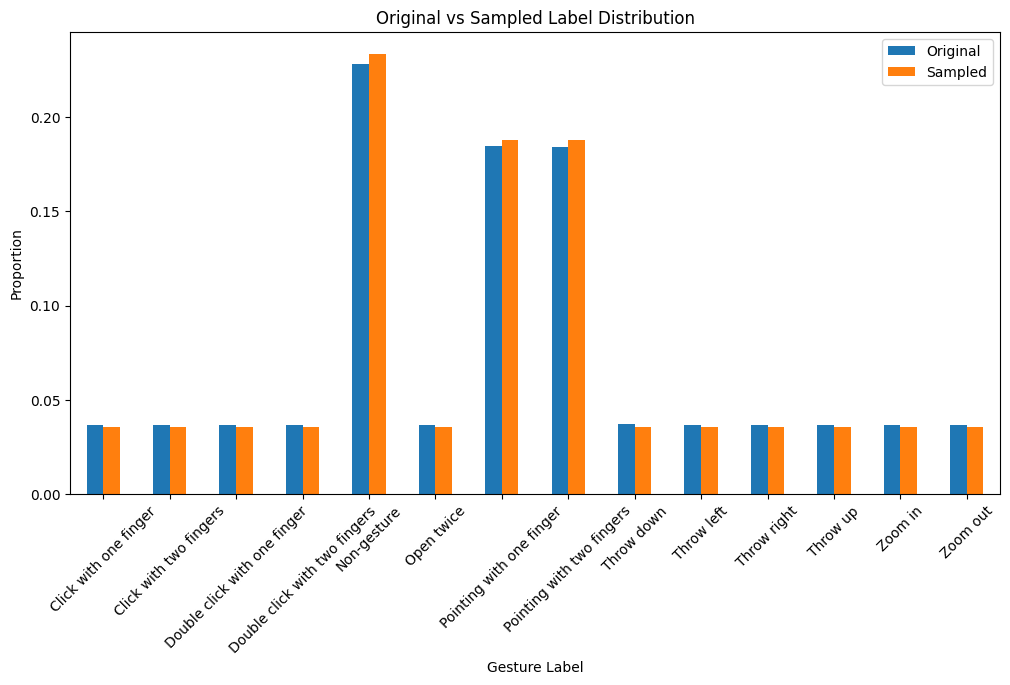

In [ ]:
import matplotlib.pyplot as plt

# Calculate the original and sampled label distributions
original_label_counts = df_train["Label"].value_counts(normalize=True)  # Normalize to get proportions
sampled_label_counts = sampled_df["Label"].value_counts(normalize=True)  # Normalize to get proportions

# Create a DataFrame to combine both distributions for easier comparison
comparison_df = pd.DataFrame({
    "Original": original_label_counts,
    "Sampled": sampled_label_counts
}).fillna(0)  # Fill missing labels in sampled with 0

# Plot the comparison
comparison_df.plot(kind="bar", figsize=(12, 6), title="Original vs Sampled Label Distribution")
plt.xlabel("Gesture Label")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()



##Experiments

In [ ]:
print(sampled_df.describe())

              Label        Video_ID  \
count            84              84   
unique           14              41   
top     Non-gesture  4CM11_13_R__32   
freq             25               6   

                                                   Frames  
count                                                  84  
unique                                                 84  
top     [3762, 3763, 3764, 3765, 3766, 3767, 3768, 376...  
freq                                                    1  


In [ ]:
sampled_df_smol = sampled_df.head()
sampled_df_smol

,Label,Video_ID,Frames
0,Click with one finger,1CM42_31_R__130,"[3762, 3763, 3764, 3765, 3766, 3767, 3768, 376..."
1,Click with one finger,4CM11_20_R__43,"[338, 339, 340, 341, 342, 343, 344, 345, 346, ..."
2,Click with one finger,1CV12_21_R__110,"[3398, 3399, 3400, 3401, 3402, 3403, 3404, 340..."
3,Click with two fingers,1CM42_15_R__198,"[2765, 2766, 2767, 2768, 2769, 2770, 2771, 277..."
4,Click with two fingers,1CM1_2_R__222,"[1988, 1989, 1990, 1991, 1992, 1993, 1994, 199..."


In [ ]:
import os
import numpy as np
import pandas as pd
import mediapipe as mp
from sklearn.decomposition import PCA

# Paths
video_dir = '/content/7/videos/videos'
output_path = '/content/flow_vectors_small_data.npy'

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize PCA
pca = PCA(n_components=10)  # Reduce to 10 dimensions

# To store flow vectors and labels
flow_vectors = []
labels = []

# Iterate over each gesture in the sampled dataset
for index, row in small_dataset.iterrows():
    label = row['Label']
    video_id = row['Video_ID']
    # Ensure frame_indices is a list
    frame_indices = row['Frames'] if isinstance(row['Frames'], list) else eval(row['Frames'])


    video_path = os.path.join(video_dir, f"{video_id}.avi")
    if not os.path.exists(video_path):
        print(f"Video file not found: {video_path}")
        continue

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        continue

    # To store landmarks for all frames in the gesture
    gesture_landmarks = []

    for frame_idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx - 1)
        ret, frame = cap.read()
        if not ret:
            print(f"Error reading frame {frame_idx} from video {video_id}")
            continue

        # Process the frame with MediaPipe
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(frame_rgb)

        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0]  # Use the first detected hand
            landmarks = [(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark]
            gesture_landmarks.append(landmarks)

    cap.release()

    # Skip if there are less than 2 frames of landmarks
    if len(gesture_landmarks) < 2:
        print(f"Not enough frames for gesture: {label} in video {video_id}")
        continue

    # Convert landmarks to NumPy array: Shape (T, 21, 3)
    gesture_landmarks = np.array(gesture_landmarks)

    # Compute temporal differences: Shape (T-1, 21, 3)
    temporal_diff = np.diff(gesture_landmarks, axis=0)

    # Flatten temporal differences: Shape (T-1, 63)
    flow_vector = temporal_diff.reshape(temporal_diff.shape[0], -1)

    # Apply PCA: Shape (T-1, 10)
    n_components = min(flow_vector.shape[0], 10)  # Choose the smaller of T-1 or 10
    flow_vector_reduced = PCA(n_components=n_components).fit_transform(flow_vector)


    # Compute trajectory-based features (e.g., wrist landmark: index 0)
    wrist_trajectory = gesture_landmarks[:, 0, :]  # Shape (T, 3)
    wrist_velocity = np.mean(np.linalg.norm(np.diff(wrist_trajectory, axis=0), axis=1))  # Mean velocity
    wrist_direction = np.arctan2(
        np.diff(wrist_trajectory[:, 1]),  # dy
        np.diff(wrist_trajectory[:, 0])   # dx
    ).mean()  # Mean direction
    wrist_motion_variance = np.var(wrist_trajectory, axis=0)  # Variance of wrist motion

    # Combine PCA-reduced flow vector and trajectory features
    trajectory_features = [wrist_velocity, wrist_direction] + wrist_motion_variance.tolist()
    combined_vector = np.concatenate([flow_vector_reduced.flatten(), trajectory_features])

    # Append the combined vector and label
    flow_vectors.append(combined_vector)
    labels.append(label)

hands.close()

# Save the flow vectors and labels to a file
output_data = {"flow_vectors": flow_vectors, "labels": labels}
np.save(output_path, output_data)

print(f"Flow vectors and labels saved to {output_path}")


Flow vectors and labels saved to /content/flow_vectors_small_data.npy


In [ ]:
len(gesture_landmarks)

56

In [ ]:
import numpy as np

# Path to the stored vectors
npy_file_path = "/content/flow_vectors_with_labels.npy"

# Load the file
flow_data = np.load(npy_file_path, allow_pickle=True).item()

# Extract flow vectors and labels
flow_vectors = flow_data["flow_vectors"]
labels = flow_data["labels"]

print(f"Loaded {len(flow_vectors)} flow vectors and their labels.")


Loaded 84 flow vectors and their labels.


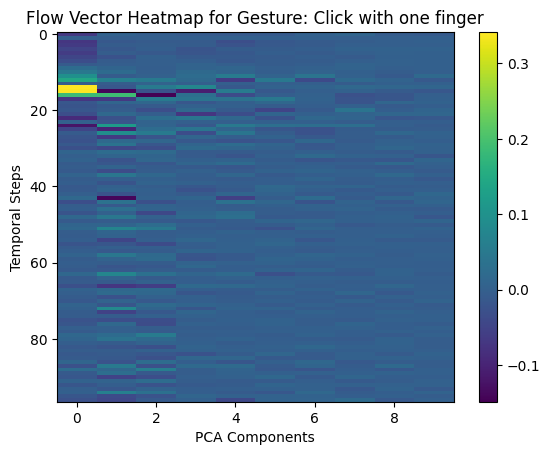

In [ ]:
# Reshape the flow vector dynamically
if flow_vector.size % 10 == 0:
    flow_vector_reshaped = flow_vector.reshape(-1, 10)
else:
    # Trim or pad to make reshaping possible
    trim_size = (flow_vector.size // 10) * 10
    flow_vector_trimmed = flow_vector[:trim_size]
    flow_vector_reshaped = flow_vector_trimmed.reshape(-1, 10)

# Visualize the reshaped flow vector
import matplotlib.pyplot as plt

plt.imshow(flow_vector_reshaped, cmap="viridis", aspect="auto")
plt.colorbar()
plt.title(f"Flow Vector Heatmap for Gesture: {label}")
plt.xlabel("PCA Components")
plt.ylabel("Temporal Steps")
plt.show()


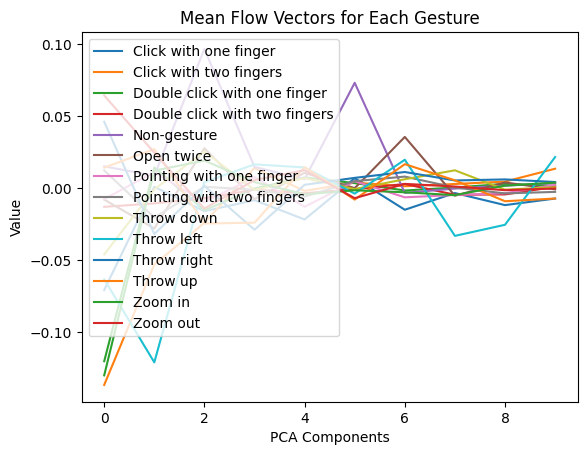

In [ ]:
import pandas as pd

# Combine flow vectors and labels into a DataFrame
df = pd.DataFrame({
    "Flow_Vector": flow_vectors,
    "Label": labels
})

def pad_or_trim_vector(vector, target_length):
    if len(vector) < target_length:
        return np.pad(vector, (0, target_length - len(vector)), 'constant')
    else:
        return vector[:target_length]

# Determine the maximum vector length
max_length = max(len(v) for v in df["Flow_Vector"])

# Apply the padding/trimming function to all vectors
df["Flow_Vector_Padded"] = df["Flow_Vector"].apply(lambda x: pad_or_trim_vector(x, max_length))

# Group by label and compute the mean vector (using the padded vectors)
mean_vectors = df.groupby("Label")["Flow_Vector_Padded"].apply(lambda x: np.mean(np.stack(x), axis=0))

# Visualize the mean vector for each gesture label
for label, mean_vector in mean_vectors.items():
    plt.plot(mean_vector[:10], label=label)  # Plot the first 10 components
plt.title("Mean Flow Vectors for Each Gesture")
plt.xlabel("PCA Components")
plt.ylabel("Value")
plt.legend()
plt.show()


In [ ]:
from sklearn.decomposition import PCA

# Flatten flow vectors
flow_matrix = np.stack(flow_vectors)  # Shape: (num_vectors, vector_length)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
flow_2d = pca.fit_transform(flow_matrix)

# Scatter plot of reduced vectors
plt.scatter(flow_2d[:, 0], flow_2d[:, 1], c=[hash(label) % 10 for label in labels], cmap="tab10", alpha=0.7)
plt.title("Flow Vectors Visualized in 2D")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Gesture Labels")
plt.show()


ValueError: all input arrays must have the same shape

In [ ]:
import os
import numpy as np
import pandas as pd
import mediapipe as mp

# Paths
video_dir = '/content/7/videos/videos'
output_path = '/content/flow_vectors_5.npy'

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# To store flow vectors and labels
flow_vectors = []
labels = []

# Define indices of the 3 key landmarks (Wrist, Thumb Tip, Index Finger Tip)
key_landmarks = [0, 4, 8, 12, 17] #Work on this!!

# Iterate over each gesture in the sampled dataset
for index, row in sampled_df.iterrows():
    label = row['Label']
    video_id = row['Video_ID']
    frame_indices = row['Frames']  # Convert frames column to list

    video_path = os.path.join(video_dir, f"{video_id}.avi")
    if not os.path.exists(video_path):
        print(f"Video file not found: {video_path}")
        continue

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        continue

    # To store landmarks for all frames in the gesture
    gesture_landmarks = []

    for frame_idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx - 1)
        ret, frame = cap.read()
        if not ret:
            print(f"Error reading frame {frame_idx} from video {video_id}")
            continue

        # Process the frame with MediaPipe
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(frame_rgb)

        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0]  # Use the first detected hand
            landmarks = [(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark]
            # Extract only the key landmarks
            gesture_landmarks.append([landmarks[i] for i in key_landmarks])

    cap.release()

    # Skip if there are less than 2 frames of landmarks
    if len(gesture_landmarks) < 2:
        print(f"Not enough frames for gesture: {label} in video {video_id}")
        continue

    # Convert landmarks to NumPy array: Shape (T, 3, 3)
    gesture_landmarks = np.array(gesture_landmarks)

    # Compute temporal differences: Shape (T-1, 3, 3)
    temporal_diff = np.diff(gesture_landmarks, axis=0)

    # Flatten temporal differences: Shape (T-1, 9)
    flow_vector = temporal_diff.reshape(temporal_diff.shape[0], -1)

    # Compute summary statistics for trajectory-based features
    # Mean velocity
    mean_velocity = np.mean(np.linalg.norm(np.diff(gesture_landmarks[:, 0, :], axis=0), axis=1))

    # Append the reduced vector and label
    flow_vectors.append(flow_vector.flatten())  # Flatten into a 1D vector
    labels.append(label)

hands.close()

# Save the flow vectors and labels to a file
output_data = {"flow_vectors": flow_vectors, "labels": labels}
np.save(output_path, output_data)

print(f"Flow vectors (using 3 key landmarks) and labels saved to {output_path}")


Flow vectors (using 3 key landmarks) and labels saved to /content/flow_vectors_5.npy


In [ ]:
gesture_landmarks.shape

(56, 21, 3)

In [ ]:
import numpy as np

# Path to the stored flow vectors
npy_file_path = '/content/flow_vectors_5.npy'

# Load the saved data
flow_data = np.load(npy_file_path, allow_pickle=True).item()

# Extract flow vectors and labels
flow_vectors = flow_data["flow_vectors"]
labels = flow_data["labels"]

print(f"Loaded {len(flow_vectors)} flow vectors with corresponding labels.")


Loaded 84 flow vectors with corresponding labels.


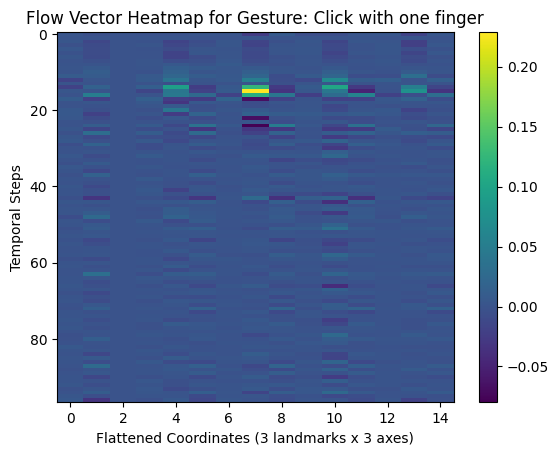

In [ ]:
import matplotlib.pyplot as plt

# Select the first flow vector for visualization
vector_index = 0
flow_vector = flow_vectors[vector_index]  # First flow vector
label = labels[vector_index]  # Corresponding label

# Reshape the flow vector for visualization (T-1, 9)
flow_vector_reshaped = flow_vector.reshape(-1, 3 * len(key_landmarks) )

# Plot the heatmap
plt.imshow(flow_vector_reshaped, cmap="viridis", aspect="auto")
plt.colorbar()
plt.title(f"Flow Vector Heatmap for Gesture: {label}")
plt.xlabel("Flattened Coordinates (3 landmarks x 3 axes)")
plt.ylabel("Temporal Steps")
plt.show()


In [ ]:
!pip install scikit-learn

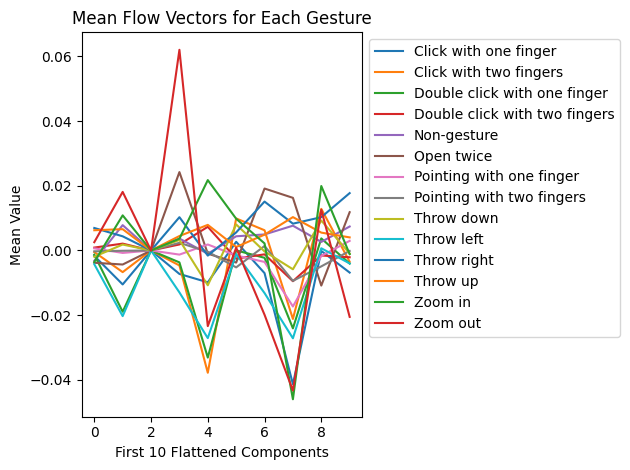

In [ ]:
import pandas as pd

# Combine flow vectors and labels into a DataFrame
df = pd.DataFrame({
    "Flow_Vector": flow_vectors,
    "Label": labels
})

# Find the maximum length
max_length = max(len(vec) for vec in df["Flow_Vector"])

# Pad or trim all flow vectors to the maximum length
df["Flow_Vector"] = df["Flow_Vector"].apply(
    lambda x: np.pad(x, (0, max_length - len(x)), mode='constant') if len(x) < max_length else x[:max_length]
)

# Compute mean vectors
mean_vectors = df.groupby("Label")["Flow_Vector"].apply(
    lambda x: np.mean(np.stack(x), axis=0)
)
# Visualize the mean vectors for each label
for label, mean_vector in mean_vectors.items():
    plt.plot(mean_vector[:10], label=label)  # Plot the first 10 components
plt.title("Mean Flow Vectors for Each Gesture")
plt.xlabel("First 10 Flattened Components")
plt.ylabel("Mean Value")
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


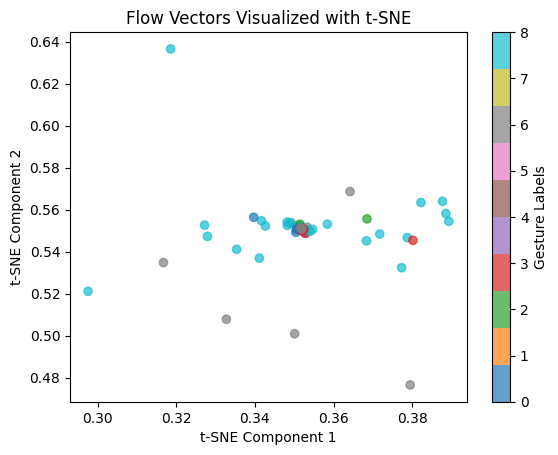

In [ ]:
from sklearn.manifold import TSNE

# Flatten flow vectors for dimensionality reduction

# Find the maximum length
# Determine the maximum shape for each dimension
# Determine the maximum shape for each dimension
max_shape = np.array([vec.shape for vec in flow_vectors]).max(axis=0)

# Pad each vector to the maximum shape
flow_vectors_padded = [
    np.pad(
        vec,
        [(0, max_shape[dim] - vec.shape[dim]) for dim in range(len(max_shape))],  # Pad each dimension
        mode='constant'
    )
    for vec in flow_vectors
]

# Stack the padded vectors
flow_matrix = np.stack(flow_vectors_padded)
# Ensure perplexity is less than the number of samples
n_samples = flow_matrix.shape[0]
perplexity = min(30, n_samples - 1)  # Adjust perplexity, defaulting to 30 if valid
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=n_samples - 1)

# Apply t-SNE with adjusted perplexity
flow_2d = tsne.fit_transform(flow_matrix)


# Plot the t-SNE projection
plt.scatter(flow_2d[:, 0], flow_2d[:, 1], c=[hash(label) % 10 for label in labels], cmap="tab10", alpha=0.7)
plt.title("Flow Vectors Visualized with t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Gesture Labels")
plt.show()

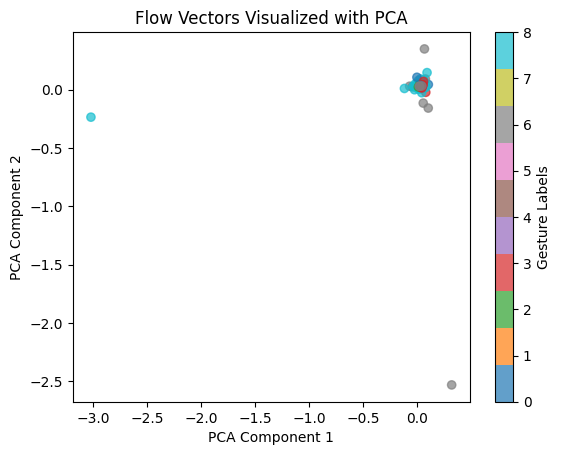

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
flow_2d_pca = pca.fit_transform(flow_matrix)

# Plot the PCA projection
plt.scatter(flow_2d_pca[:, 0], flow_2d_pca[:, 1], c=[hash(label) % 10 for label in labels], cmap="tab10", alpha=0.7)
plt.title("Flow Vectors Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Gesture Labels")
plt.show()


In [ ]:
import numpy as np

# Path to the stored flow vectors
npy_file_path_1 = '/content/flow_vectors_with_labels.npy'


# Load the saved data
flow_data = np.load(npy_file_path, allow_pickle=True).item()

# Extract flow vectors and labels
flow_vectors = flow_data["flow_vectors"]
labels = flow_data["labels"]

print(f"Loaded {len(flow_vectors)} flow vectors with corresponding labels.")


Loaded 84 flow vectors with corresponding labels.


In [ ]:
df = pd.DataFrame({
    "Flow_Vector": flow_vectors,
    "Label": labels
})

# Find the maximum length
max_length = max(len(vec) for vec in df["Flow_Vector"])

# Pad or trim all flow vectors to the maximum length
df["Flow_Vector"] = df["Flow_Vector"].apply(
    lambda x: np.pad(x, (0, max_length - len(x)), mode='constant') if len(x) < max_length else x[:max_length]
)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Prepare dataset
# Determine the maximum length of 1D flow vectors
max_length = max(len(vec) for vec in flow_vectors)

# Pad or trim 1D flow vectors
flow_vectors_padded = [
    np.pad(vec, (0, max_length - len(vec)), mode='constant') if len(vec) < max_length else vec[:max_length]
    for vec in flow_vectors
]

# Stack the padded flow vectors
X = np.stack(flow_vectors_padded)

y = np.array(labels)  # Corresponding labels

# LDA Projection
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

# Classification Accuracy (cross-validation)
clf = LogisticRegression()
accuracy = cross_val_score(clf, X, y, cv=5).mean()

print(f"Gesture Separability Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Gesture Separability Accuracy: 0.30


#Experiment 2

Finding which key landmarks are significant for each gesture class

In [ ]:
# Create a small dataset with one instance per gesture class
small_dataset = sampled_df.groupby("Label").first().reset_index()  # Select first instance per gesture class
len(small_dataset)

14

In [ ]:
small_dataset

,Label,Video_ID,Frames
0,Click with one finger,1CM42_31_R__130,"[3762, 3763, 3764, 3765, 3766, 3767, 3768, 376..."
1,Click with two fingers,1CM42_15_R__198,"[2765, 2766, 2767, 2768, 2769, 2770, 2771, 277..."
2,Double click with one finger,4CM11_18_R__45,"[2372, 2373, 2374, 2375, 2376, 2377, 2378, 237..."
3,Double click with two fingers,4CM11_24_L__64,"[3520, 3521, 3522, 3523, 3524, 3525, 3526, 352..."
4,Non-gesture,4CM11_18_R__46,"[2951, 2952, 2953, 2954, 2955, 2956, 2957, 295..."
5,Open twice,1CM42_15_R__198,"[4372, 4373, 4374, 4375, 4376, 4377, 4378, 437..."
6,Pointing with one finger,1CM1_3_R__227,"[4401, 4402, 4403, 4404, 4405, 4406, 4407, 440..."
7,Pointing with two fingers,1CV12_12_R__89,"[183, 184, 185, 186, 187, 188, 189, 190, 191, ..."
8,Throw down,1CV12_21_R__111,"[1604, 1605, 1606, 1607, 1608, 1609, 1610, 161..."
9,Throw left,4CM11_18_R__45,"[1764, 1765, 1766, 1767, 1768, 1769, 1770, 177..."


###Approach 1 Temporal variance

In [ ]:
import os
import numpy as np
import cv2
import mediapipe as mp

# Paths
video_dir = '/content/7/videos/videos'
output_path = '/content/landmark_vectors_small_data.csv'

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# To store landmarks and labels
landmark_vectors = []
labels = []

# Iterate over each gesture in the sampled dataset
for index, row in small_dataset.iterrows():
    label = row['Label']
    video_id = row['Video_ID']
    # Ensure frame_indices is a list
    frame_indices = row['Frames'] if isinstance(row['Frames'], list) else eval(row['Frames'])

    video_path = os.path.join(video_dir, f"{video_id}.avi")
    if not os.path.exists(video_path):
        print(f"Video file not found: {video_path}")
        continue

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        continue

    # To store landmarks for all frames in the gesture
    for frame_idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx - 1)
        ret, frame = cap.read()
        if not ret:
            print(f"Error reading frame {frame_idx} from video {video_id}")
            continue

        # Process the frame with MediaPipe
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(frame_rgb)

        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0]  # Use the first detected hand
            landmarks = [(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark]  # Extract all 21 landmarks
            # Flatten the landmarks and append them to the list
            landmark_vectors.append([label] + [coord for point in landmarks for coord in point])
        else:
            # Append a placeholder for missing landmarks
            landmark_vectors.append([label] + [0.0] * 63)  # 21 landmarks * 3 coordinates

    cap.release()

hands.close()

# Convert to DataFrame and save to CSV
import pandas as pd
columns = ["Label"] + [f"L{i}_{axis}" for i in range(21) for axis in ["x", "y", "z"]]
df = pd.DataFrame(landmark_vectors, columns=columns)
df.to_csv(output_path, index=False)

print(f"Landmark vectors and labels saved to {output_path}")


Landmark vectors and labels saved to /content/landmark_vectors_small_data.csv


In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
landmark_df = pd.read_csv('/content/landmark_vectors_small_data.csv')

# Create gesture_data: {label: landmarks_array}
gesture_data = {}
for label, group in landmark_df.groupby("Label"):
    # Extract landmarks for each gesture
    landmarks = group.iloc[:, 1:].values.reshape(-1, 21, 3)  # Reshape to (T, 21, 3)
    gesture_data[label] = landmarks

# Now gesture_data is compatible with the temporal variance script
print("Gesture data successfully created!")
for label, landmarks in gesture_data.items():
    print(f"{label}: {landmarks.shape}")  # Print shape for each gesture


Gesture data successfully created!
Click with one finger: (98, 21, 3)
Click with two fingers: (44, 21, 3)
Double click with one finger: (52, 21, 3)
Double click with two fingers: (84, 21, 3)
Non-gesture: (186, 21, 3)
Open twice: (54, 21, 3)
Pointing with one finger: (267, 21, 3)
Pointing with two fingers: (237, 21, 3)
Throw down: (107, 21, 3)
Throw left: (72, 21, 3)
Throw right: (126, 21, 3)
Throw up: (48, 21, 3)
Zoom in: (130, 21, 3)
Zoom out: (56, 21, 3)


In [ ]:
import numpy as np

# Assuming gesture_landmarks is a NumPy array: (T, 21, 3) for a single gesture
def compute_landmark_variance(gesture_landmarks):
    # Compute variance over time for each landmark
    temporal_variance = np.var(gesture_landmarks, axis=0)  # Shape: (21, 3)
    # Sum variance across x, y, z axes for each landmark
    total_variance = np.sum(temporal_variance, axis=1)  # Shape: (21,)
    return total_variance

# Apply variance calculation for each gesture
landmark_variance_per_gesture = {}
for gesture_label, landmarks in gesture_data.items():  # Assume gesture_data is {label: landmarks_array}
    landmark_variance_per_gesture[gesture_label] = compute_landmark_variance(landmarks)

# Select top landmarks for each gesture
top_landmarks_per_gesture_2 = {
    gesture_label: np.argsort(-variance)[:5]  # Top 5 landmarks
    for gesture_label, variance in landmark_variance_per_gesture.items()
}

print("Top landmarks for each gesture:", top_landmarks_per_gesture_2)


Top landmarks for each gesture: {'Click with one finger': array([ 8,  7,  6, 14, 18]), 'Click with two fingers': array([12, 11,  8,  7,  0]), 'Double click with one finger': array([ 8,  4,  7, 10, 14]), 'Double click with two fingers': array([12,  8, 11,  7, 10]), 'Non-gesture': array([ 0,  1,  2, 17, 13]), 'Open twice': array([12, 16,  8, 11, 15]), 'Pointing with one finger': array([ 8,  7,  4, 14, 10]), 'Pointing with two fingers': array([12,  8, 11,  4,  7]), 'Throw down': array([12, 16,  8, 11, 15]), 'Throw left': array([16, 20, 19, 15, 12]), 'Throw right': array([ 8, 12,  4, 16,  7]), 'Throw up': array([12, 16,  8, 20, 15]), 'Zoom in': array([12,  8, 11,  7, 10]), 'Zoom out': array([12,  8, 11,  7,  4])}


###Approach 2 Feature Importance using Random Forest

In [ ]:
landmark_df = pd.read_csv('/content/landmark_vectors_small_data.csv')
landmark_df

,Label,L0_x,L0_y,L0_z,L1_x,L1_y,L1_z,L2_x,L2_y,L2_z,...,L17_z,L18_x,L18_y,L18_z,L19_x,L19_y,L19_z,L20_x,L20_y,L20_z
0,Click with one finger,0.383943,0.700402,1.326386e-07,0.414207,0.679413,-0.015155,0.436720,0.653326,-0.036508,...,-0.067310,0.368267,0.640436,-0.086730,0.385487,0.667167,-0.080999,0.382483,0.676262,-0.073371
1,Click with one finger,0.386019,0.695705,5.215328e-08,0.418062,0.673778,-0.015043,0.441008,0.642856,-0.035360,...,-0.063954,0.368508,0.626089,-0.082404,0.384934,0.654647,-0.077380,0.383471,0.665874,-0.070143
2,Click with one finger,0.386233,0.695687,5.388220e-08,0.417774,0.673435,-0.015068,0.440661,0.642009,-0.035593,...,-0.064861,0.368817,0.627209,-0.083714,0.385294,0.656089,-0.078652,0.383041,0.667042,-0.071396
3,Click with one finger,0.388730,0.682052,1.085794e-07,0.418759,0.665525,-0.017769,0.442090,0.634682,-0.040201,...,-0.063691,0.367733,0.601938,-0.083295,0.385638,0.633814,-0.076482,0.384847,0.648719,-0.067425
4,Click with one finger,0.386146,0.673418,9.601831e-08,0.418921,0.658874,-0.021304,0.444777,0.629225,-0.044648,...,-0.059567,0.368366,0.581587,-0.079261,0.386721,0.615274,-0.072845,0.389293,0.632814,-0.063304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,Zoom out,0.234828,0.729201,2.064061e-07,0.268427,0.722276,-0.023817,0.302831,0.671763,-0.034605,...,-0.016361,0.210012,0.572202,-0.043291,0.216325,0.625325,-0.038281,0.218572,0.655465,-0.024608
1557,Zoom out,0.234040,0.726783,2.582770e-07,0.265120,0.723332,-0.021722,0.300910,0.677175,-0.030034,...,-0.011684,0.204705,0.570286,-0.037645,0.214190,0.619849,-0.032154,0.218401,0.650205,-0.018333
1558,Zoom out,0.235623,0.741730,6.424078e-08,0.268589,0.729910,-0.019541,0.299522,0.684377,-0.030298,...,-0.024132,0.203281,0.577357,-0.049384,0.214328,0.628750,-0.043106,0.220565,0.663684,-0.029584
1559,Zoom out,0.235054,0.746871,-3.947147e-08,0.269169,0.736903,-0.020059,0.299915,0.687583,-0.030656,...,-0.022898,0.201236,0.583479,-0.049879,0.212415,0.636074,-0.045001,0.219491,0.673018,-0.032336



Processing gesture: Click with one finger
Top landmarks for gesture 'Click with one finger':
  Landmark 17: Importance 0.0915
  Landmark 13: Importance 0.0858
  Landmark 6: Importance 0.0798
  Landmark 7: Importance 0.0705
  Landmark 10: Importance 0.0655

Processing gesture: Click with two fingers
Top landmarks for gesture 'Click with two fingers':
  Landmark 1: Importance 0.0885
  Landmark 0: Importance 0.0807
  Landmark 11: Importance 0.0681
  Landmark 6: Importance 0.0675
  Landmark 7: Importance 0.0597

Processing gesture: Double click with one finger
Top landmarks for gesture 'Double click with one finger':
  Landmark 1: Importance 0.0755
  Landmark 16: Importance 0.0707
  Landmark 9: Importance 0.0678
  Landmark 6: Importance 0.0668
  Landmark 20: Importance 0.0621

Processing gesture: Double click with two fingers
Top landmarks for gesture 'Double click with two fingers':
  Landmark 11: Importance 0.0871
  Landmark 12: Importance 0.0849
  Landmark 8: Importance 0.0849
  Landma

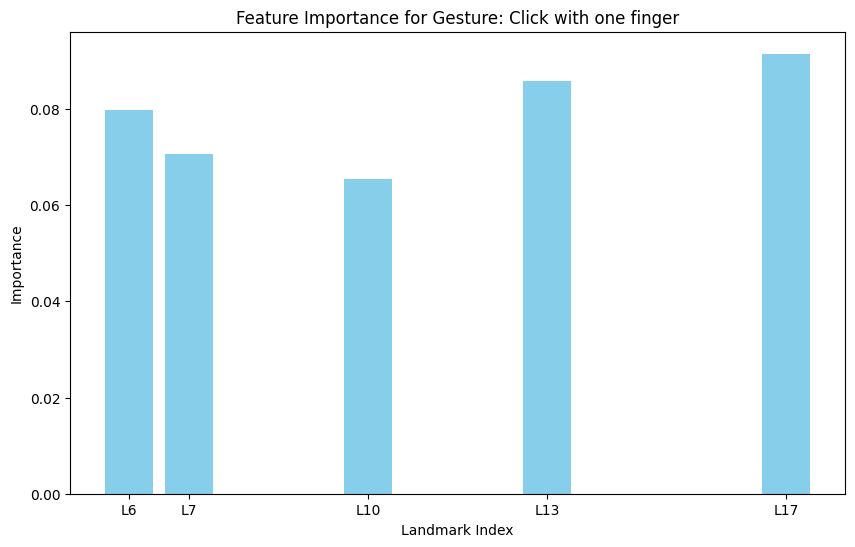

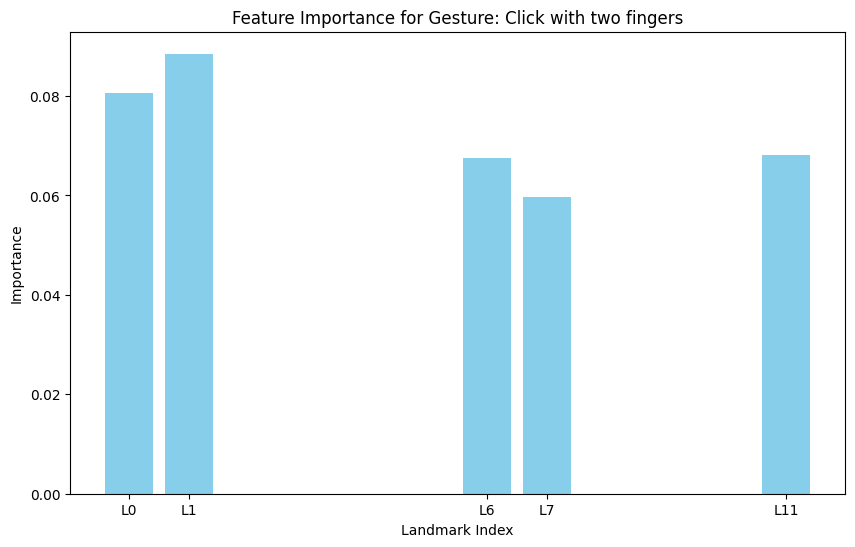

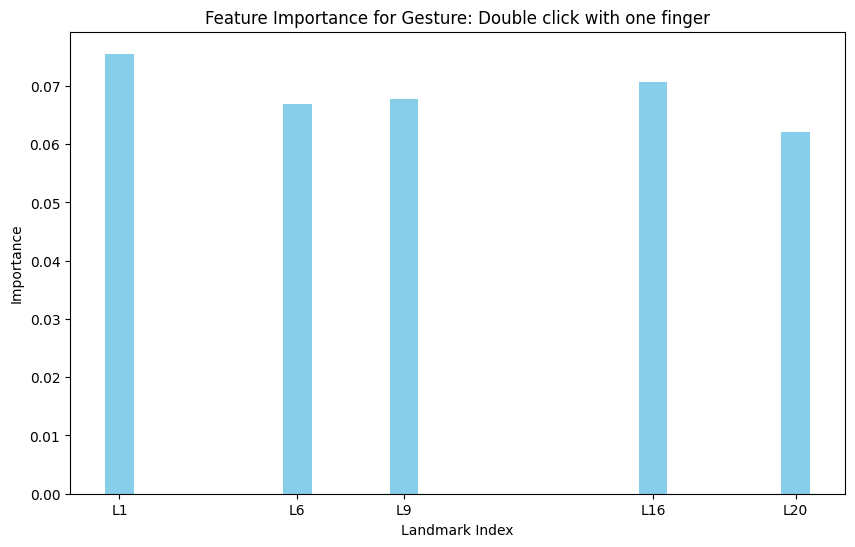

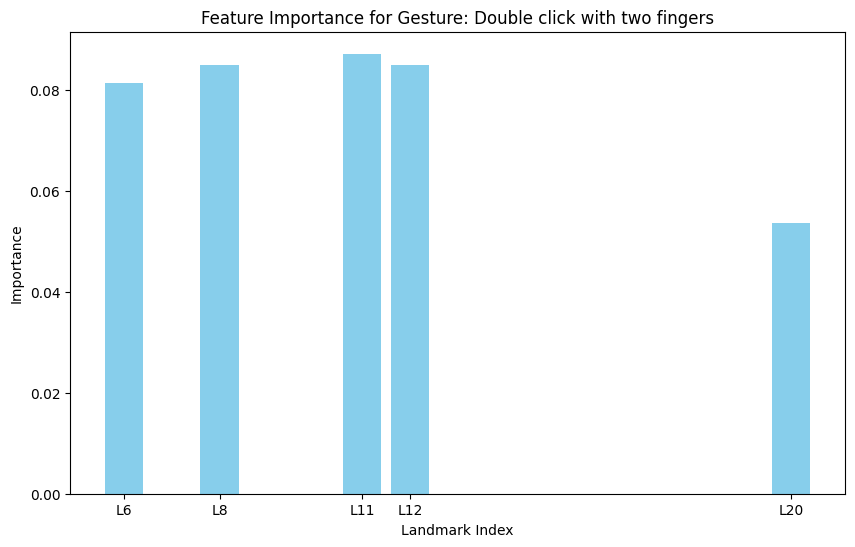

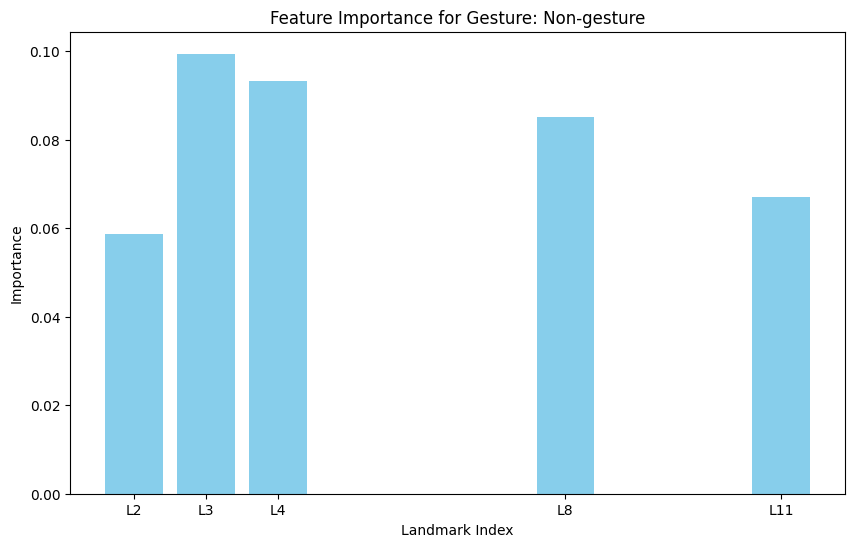

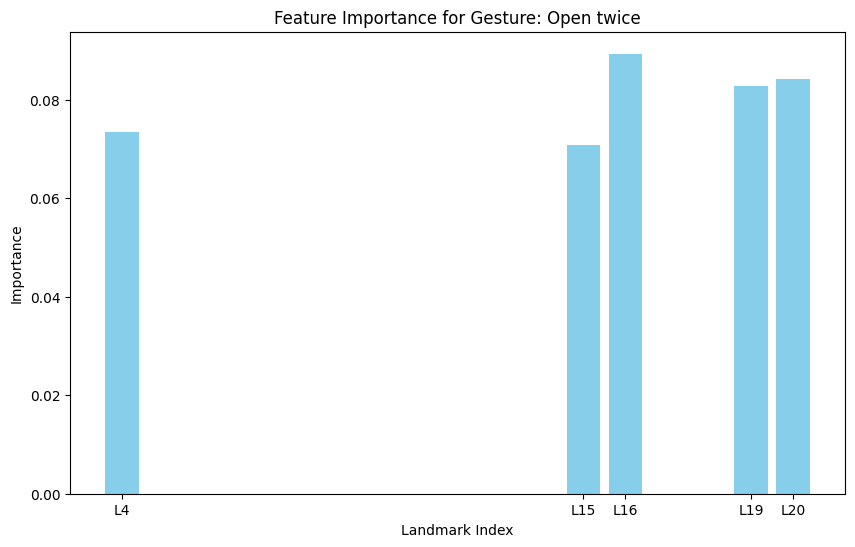

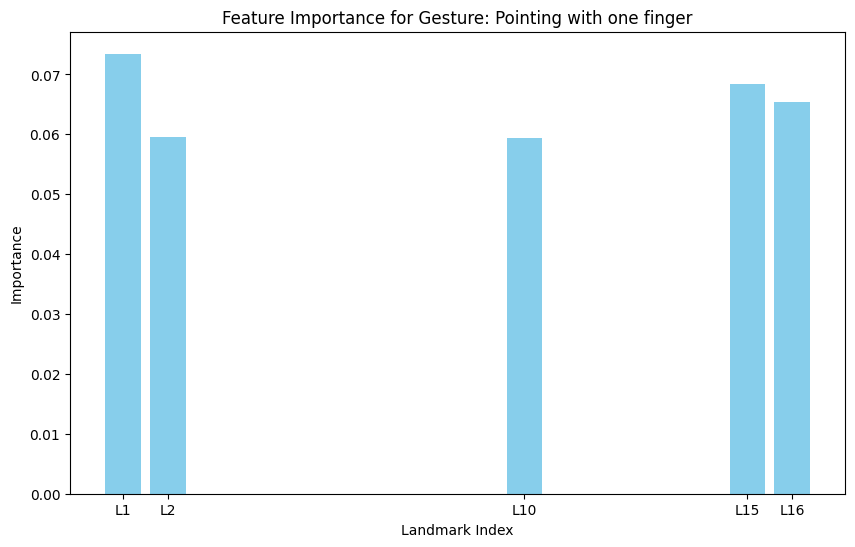

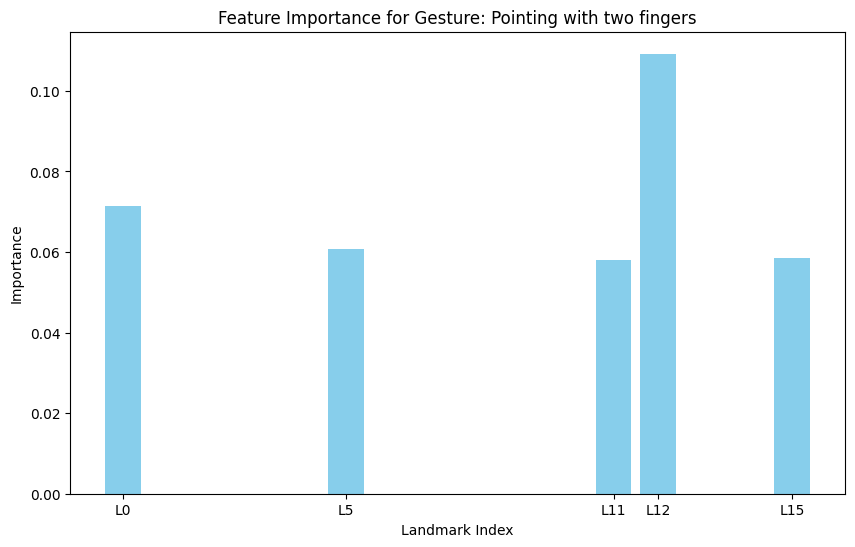

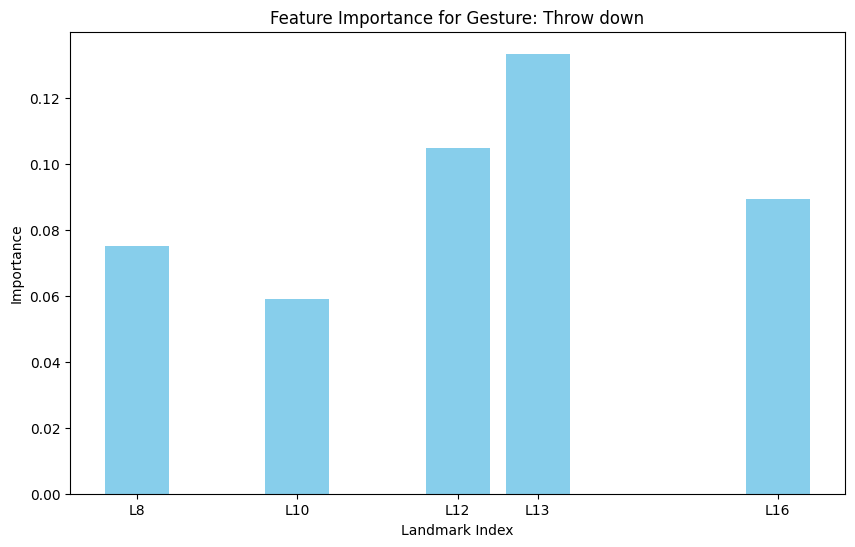

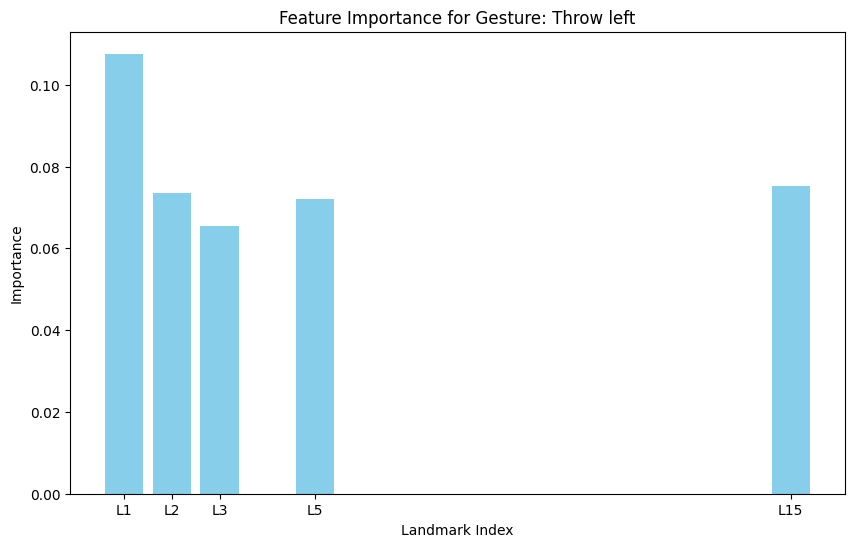

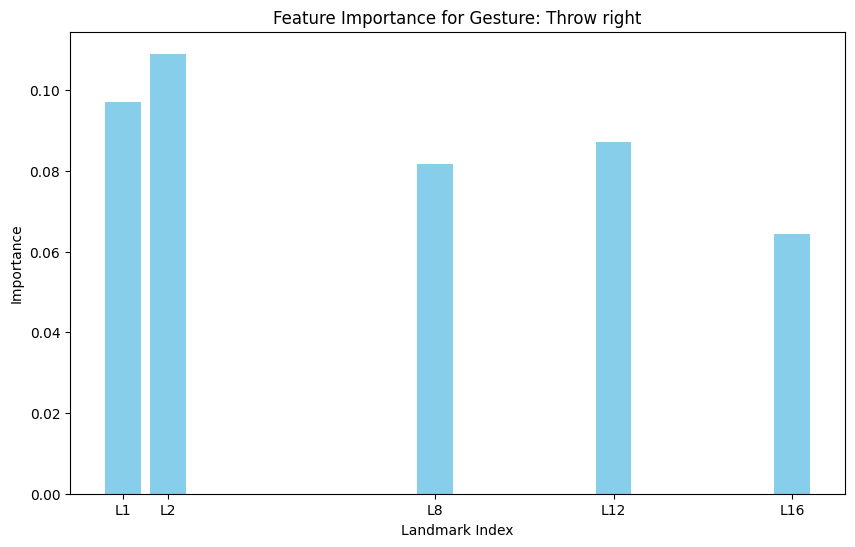

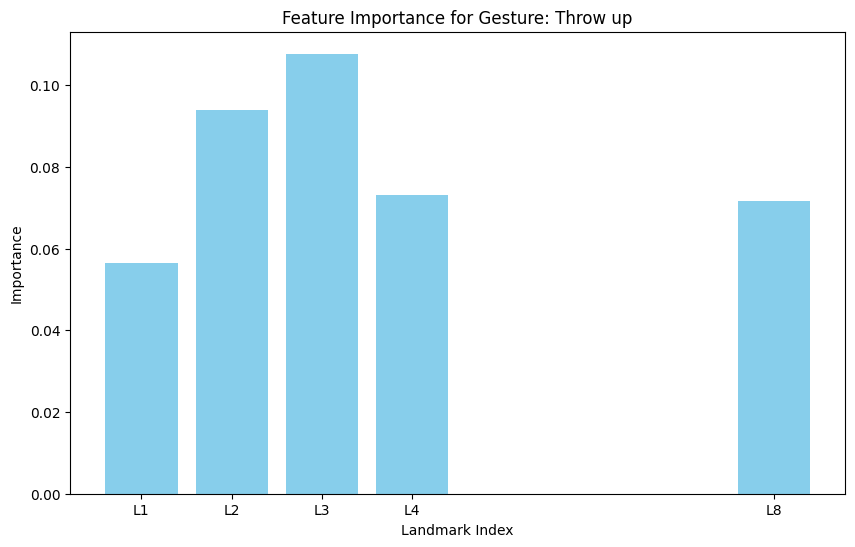

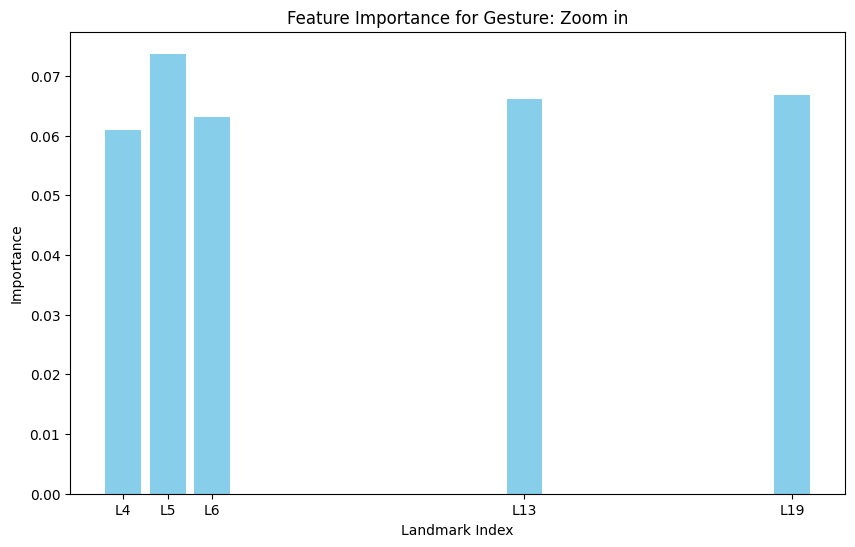

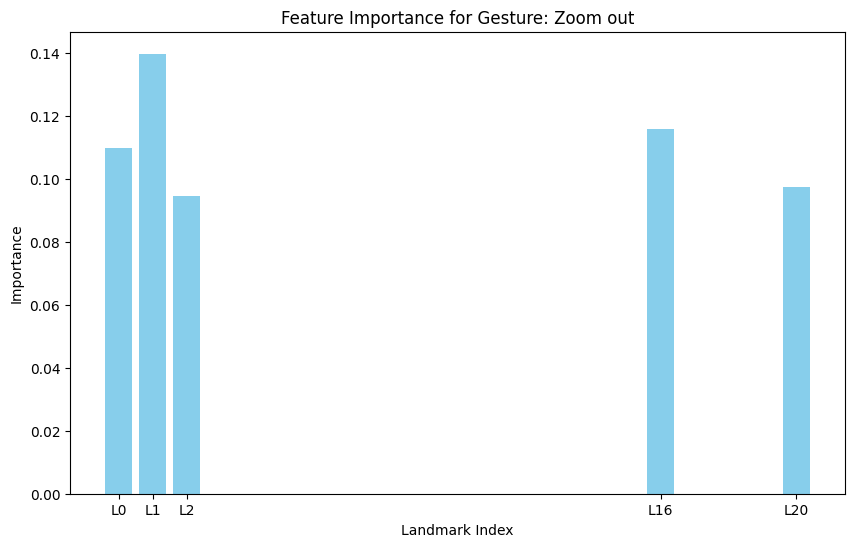

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/landmark_vectors_small_data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Split the dataset into features (X) and labels (y)
X = df.iloc[:, 1:].values  # All columns except the first one (landmarks as features)
y = df.iloc[:, 0].values   # First column (gesture labels)

# Unique gesture labels
gesture_classes = np.unique(y)

# Dictionary to store top landmarks for each gesture
top_landmarks_per_gesture = {}

# Iterate over each gesture class
for gesture in gesture_classes:
    print(f"\nProcessing gesture: {gesture}")

    # Create binary labels for "one-vs-rest" classification
    binary_labels = (y == gesture).astype(int)

    # Train a Random Forest Classifier
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, binary_labels)

    # Compute feature importance
    feature_importances = rf.feature_importances_

    # Reshape feature importances into (21 landmarks, 3 axes)
    num_landmarks = 21
    landmark_importances = feature_importances.reshape(num_landmarks, 3)

    # Sum importances across axes (x, y, z) for each landmark
    landmark_importance_sums = np.sum(landmark_importances, axis=1)

    # Sort landmarks by importance
    sorted_indices = np.argsort(-landmark_importance_sums)
    top_landmarks = sorted_indices[:5]  # Top 5 landmarks for this gesture

    # Save top landmarks for this gesture
    top_landmarks_per_gesture[gesture] = {
        "top_landmarks": top_landmarks,
        "importance_values": landmark_importance_sums[top_landmarks]
    }

    # Print results for this gesture
    print(f"Top landmarks for gesture '{gesture}':")
    for i, landmark in enumerate(top_landmarks):
        print(f"  Landmark {landmark}: Importance {landmark_importance_sums[landmark]:.4f}")

# Optional: Visualize feature importance for each gesture
for gesture, data in top_landmarks_per_gesture.items():
    plt.figure(figsize=(10, 6))
    plt.bar(data["top_landmarks"], data["importance_values"], color='skyblue')
    plt.title(f"Feature Importance for Gesture: {gesture}")
    plt.xlabel("Landmark Index")
    plt.ylabel("Importance")
    plt.xticks(data["top_landmarks"], [f"L{i}" for i in data["top_landmarks"]])
    plt.show()


In [ ]:
import pandas as pd
# Convert the top_landmarks_per_gesture dictionary into a DataFrame with top landmarks as a list
# Each row will represent a gesture, and the top landmarks column will contain a list of landmarks

# Create a list of rows for the DataFrame
rows = []
for gesture, data in top_landmarks_per_gesture.items():
    rows.append({
        "Gesture": gesture,
        "Top Landmarks": data["top_landmarks"],
        "Importance Values": data["importance_values"]
    })

# Create a DataFrame
df_top_landmarks = pd.DataFrame(rows)

# Display the DataFrame
df_top_landmarks

# Save the DataFrame to a CSV file
#output_path = '/path/to/top_landmarks_per_gesture.csv'  # Replace with your desired path
#df_top_landmarks.to_csv(output_path, index=False)

#print(f"Top landmarks per gesture saved to {output_path}")


,Gesture,Top Landmarks,Importance Values
0,Click with one finger,"[17, 13, 6, 7, 10]","[0.09146309340538017, 0.08581323566724064, 0.0..."
1,Click with two fingers,"[1, 0, 11, 6, 7]","[0.08850629366956281, 0.08069549285150757, 0.0..."
2,Double click with one finger,"[1, 16, 9, 6, 20]","[0.07553001773509588, 0.07065453670598688, 0.0..."
3,Double click with two fingers,"[11, 12, 8, 6, 20]","[0.08708208997444564, 0.08491288958004295, 0.0..."
4,Non-gesture,"[3, 4, 8, 11, 2]","[0.09937942615212172, 0.09321108365633571, 0.0..."
5,Open twice,"[16, 20, 19, 4, 15]","[0.0893353905239841, 0.08425026923541097, 0.08..."
6,Pointing with one finger,"[1, 15, 16, 2, 10]","[0.07346251072680313, 0.06834058729925932, 0.0..."
7,Pointing with two fingers,"[12, 0, 5, 15, 11]","[0.10922514203705735, 0.07145177168428102, 0.0..."
8,Throw down,"[13, 12, 16, 8, 10]","[0.13327603384749637, 0.10463659337854699, 0.0..."
9,Throw left,"[1, 15, 2, 5, 3]","[0.10760582718438284, 0.07534088473176953, 0.0..."


In [ ]:
import pandas as pd
# Convert the top_landmarks_per_gesture dictionary into a DataFrame with top landmarks as a list
# Each row will represent a gesture, and the top landmarks column will contain a list of landmarks

# Create a list of rows for the DataFrame
rows = []
for gesture, data in top_landmarks_per_gesture_2.items():
    rows.append({
        "Gesture": gesture,
        "Top Landmarks": data,
    })

# Create a DataFrame
df_top_landmarks_2 = pd.DataFrame(rows)

# Display the DataFrame
df_top_landmarks_2

,Gesture,Top Landmarks
0,Click with one finger,"[8, 7, 6, 14, 18]"
1,Click with two fingers,"[12, 11, 8, 7, 0]"
2,Double click with one finger,"[8, 4, 7, 10, 14]"
3,Double click with two fingers,"[12, 8, 11, 7, 10]"
4,Non-gesture,"[0, 1, 2, 17, 13]"
5,Open twice,"[12, 16, 8, 11, 15]"
6,Pointing with one finger,"[8, 7, 4, 14, 10]"
7,Pointing with two fingers,"[12, 8, 11, 4, 7]"
8,Throw down,"[12, 16, 8, 11, 15]"
9,Throw left,"[16, 20, 19, 15, 12]"


In [ ]:
merged_df = pd.merge(df_top_landmarks, df_top_landmarks_2, on="Gesture", suffixes=("_RF", "_TV"))

# Compute the union of top landmarks for each gesture
merged_df["Union Top Landmarks"] = merged_df.apply(
    lambda row: sorted(set(row["Top Landmarks_RF"]).union(set(row["Top Landmarks_TV"]))),
    axis=1
)

# Create the resulting DataFrame
result_df = merged_df[["Gesture", "Union Top Landmarks"]]

# Display the resulting DataFrame
result_df

# Save the resulting DataFrame to a CSV file
#output_path = '/path/to/union_top_landmarks.csv'  # Replace with your desired path
#result_df.to_csv(output_path, index=False)

#print(f"Unionised top landmarks saved to {output_path}")


,Gesture,Union Top Landmarks
0,Click with one finger,"[6, 7, 8, 10, 13, 14, 17, 18]"
1,Click with two fingers,"[0, 1, 6, 7, 8, 11, 12]"
2,Double click with one finger,"[1, 4, 6, 7, 8, 9, 10, 14, 16, 20]"
3,Double click with two fingers,"[6, 7, 8, 10, 11, 12, 20]"
4,Non-gesture,"[0, 1, 2, 3, 4, 8, 11, 13, 17]"
5,Open twice,"[4, 8, 11, 12, 15, 16, 19, 20]"
6,Pointing with one finger,"[1, 2, 4, 7, 8, 10, 14, 15, 16]"
7,Pointing with two fingers,"[0, 4, 5, 7, 8, 11, 12, 15]"
8,Throw down,"[8, 10, 11, 12, 13, 15, 16]"
9,Throw left,"[1, 2, 3, 5, 12, 15, 16, 19, 20]"


In [ ]:
import numpy as np
import pandas as pd

# Example DataFrame (replace with your actual DataFrame)
top_landmarks_df = result_df

# Compute the union of all landmarks
all_top_landmarks_union = set()
for landmarks in top_landmarks_df['Union Top Landmarks']:
    all_top_landmarks_union.update(landmarks)

# Convert to sorted list
all_top_landmarks_union = sorted(all_top_landmarks_union)

# Print the final union of top landmarks
print("Final Union of Top Landmarks:", all_top_landmarks_union)

# Save the result to a CSV if needed
#union_df = pd.DataFrame({"Top Landmarks": all_top_landmarks_union})
#union_df.to_csv("final_union_top_landmarks.csv", index=False)

#print("Union top landmarks saved to 'final_union_top_landmarks.csv'")


Final Union of Top Landmarks: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


#gesturon v_1.3

In [ ]:
sampled_df

,Label,Video_ID,Frames
0,Click with one finger,4CM11_1_R__16,"[1417, 1418, 1419, 1420, 1421, 1422, 1423, 142..."
1,Click with one finger,1CM42_18_R__177,"[2882, 2883, 2884, 2885, 2886, 2887, 2888, 288..."
2,Click with one finger,1CM42_26_R__173,"[3121, 3122, 3123, 3124, 3125, 3126, 3127, 312..."
3,Click with one finger,1CM42_26_R__174,"[78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 8..."
4,Click with one finger,4CM11_17_R__15,"[952, 953, 954, 955, 956, 957, 958, 959, 960, ..."
...,...,...,...
192,Zoom out,1CM42_7_L__202,"[2535, 2536, 2537, 2538, 2539, 2540, 2541, 254..."
193,Zoom out,1CV12_22_R__114,"[2979, 2980, 2981, 2982, 2983, 2984, 2985, 298..."
194,Zoom out,4CM11_2_R__40,"[569, 570, 571, 572, 573, 574, 575, 576, 577, ..."
195,Zoom out,4CM11_29_R__59,"[337, 338, 339, 340, 341, 342, 343, 344, 345, ..."


In [ ]:
sampled_test_df

,Label,Video_ID,Frames
0,Click with one finger,1CM1_3_R__226,"[4730, 4731, 4732, 4733, 4734, 4735, 4736, 473..."
1,Click with one finger,1CM1_2_R__223,"[359, 360, 361, 362, 363, 364, 365, 366, 367, ..."
2,Click with one finger,1CM42_31_R__130,"[3762, 3763, 3764, 3765, 3766, 3767, 3768, 376..."
3,Click with two fingers,1CM1_3_R__225,"[4137, 4138, 4139, 4140, 4141, 4142, 4143, 414..."
4,Click with two fingers,1CM1_3_R__228,"[2474, 2475, 2476, 2477, 2478, 2479, 2480, 248..."
...,...,...,...
79,Zoom in,1CV12_12_R__90,"[4290, 4291, 4292, 4293, 4294, 4295, 4296, 429..."
80,Zoom in,1CV12_12_R__91,"[749, 750, 751, 752, 753, 754, 755, 756, 757, ..."
81,Zoom out,4CM11_18_R__45,"[965, 966, 967, 968, 969, 970, 971, 972, 973, ..."
82,Zoom out,1CM42_30_R__145,"[3678, 3679, 3680, 3681, 3682, 3683, 3684, 368..."


In [ ]:
smol = sampled_df.head(2)
smol

,Label,Video_ID,Frames
0,Click with one finger,4CM11_1_R__16,"[1417, 1418, 1419, 1420, 1421, 1422, 1423, 142..."
1,Click with one finger,1CM42_18_R__177,"[2882, 2883, 2884, 2885, 2886, 2887, 2888, 288..."


In [ ]:
import os
import numpy as np
import pandas as pd
import mediapipe as mp
from sklearn.decomposition import PCA
import cv2

# Paths
video_dir = '/content/7/videos/videos'
output_path = '/content/Dataset/filtered_flow_vectors_dataset.csv'

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize PCA
pca = PCA(n_components=10)  # Set the desired number of components

# To store flow vectors, trajectory-based features, and labels
flow_vectors = []
trajectory_features_list = []
labels = []

# Iterate over each gesture in the sampled dataset
for index, row in sampled_df.iterrows():
    label = row['Label']
    video_id = row['Video_ID']

    # Ensure frame_indices is a list
    frame_indices = row['Frames'] if isinstance(row['Frames'], list) else eval(row['Frames'])

    video_path = os.path.join(video_dir, f"{video_id}.avi")
    if not os.path.exists(video_path):
        print(f"Video file not found: {video_path}")
        continue

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        continue

    # To store landmarks for all frames in the gesture
    gesture_landmarks = []

    for frame_idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx - 1)
        ret, frame = cap.read()
        if not ret:
            print(f"Error reading frame {frame_idx} from video {video_id}")
            continue

        # Process the frame with MediaPipe
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(frame_rgb)

        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0]  # Use the first detected hand
            # Extract all 21 landmarks
            landmarks = [(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark]
            gesture_landmarks.append(landmarks)

    cap.release()

    # Skip if there are less than 2 frames of landmarks
    if len(gesture_landmarks) < 2:
        print(f"Not enough frames for gesture: {label} in video {video_id}")
        continue

    # Convert landmarks to NumPy array: Shape (T, 21, 3)
    gesture_landmarks = np.array(gesture_landmarks)

    # Flatten the landmarks per frame: Shape (T, 21 * 3)
    flattened_landmarks = gesture_landmarks.reshape(gesture_landmarks.shape[0], -1)

    # Apply PCA directly on the 21 landmarks for each instance
    effective_n_components = min(flattened_landmarks.shape[0], flattened_landmarks.shape[1], 10)
    pca = PCA(n_components=effective_n_components)
    pca_reduced = pca.fit_transform(flattened_landmarks)
    # If effective_n_components < 10, pad with zeros:
    if effective_n_components < 10:
        padded_pca_vector = np.zeros(10)
        padded_pca_vector[:effective_n_components] = np.mean(pca_reduced, axis=0)
        pca_vector = padded_pca_vector
    else:
        pca_vector = np.mean(pca_reduced, axis=0)

    # Compute trajectory-based features (e.g., wrist landmark: index 0 of all landmarks)
    wrist_trajectory = gesture_landmarks[:, 0, :]  # First key landmark (wrist or equivalent)
    wrist_velocity = np.mean(np.linalg.norm(np.diff(wrist_trajectory, axis=0), axis=1))  # Mean velocity
    wrist_direction = np.arctan2(
        np.diff(wrist_trajectory[:, 1]),  # dy
        np.diff(wrist_trajectory[:, 0])   # dx
    ).mean()  # Mean direction
    wrist_motion_variance = np.var(wrist_trajectory, axis=0)  # Variance of wrist motion

    # Combine PCA-reduced landmarks and trajectory features
    trajectory_features = [wrist_velocity, wrist_direction] + wrist_motion_variance.tolist()
    combined_vector = np.concatenate([pca_vector, trajectory_features])

    # Append the flow vector, trajectory features, and label
    flow_vectors.append(combined_vector)
    labels.append(label)

hands.close()

# Create a DataFrame from the data
data = [np.concatenate([fv, [lbl]]) for fv, lbl in zip(flow_vectors, labels)]

num_columns = len(data[0])
row_lengths = [len(row) for row in data]
print(f"Row lengths: {set(row_lengths)}")
if len(set(row_lengths)) > 1:
    # If this occurs, investigate why some rows differ
    consistent_length = max(row_lengths)
    data = [row for row in data if len(row) == consistent_length]

columns = [f"PCA_Vector_{i}" for i in range(num_columns - 6)] + [
    "Wrist_Velocity", "Wrist_Direction", "Wrist_Variance_X",
    "Wrist_Variance_Y", "Wrist_Variance_Z", "Label"
]

df_dataset = pd.DataFrame(data, columns=columns)
df_dataset.to_csv(output_path, index=False)
print(f"Filtered PCA-reduced flow vectors, trajectory features, and labels saved to {output_path}")

Not enough frames for gesture: Double click with one finger in video 1CM1_4_R__229
Not enough frames for gesture: Non-gesture in video 4CM11_14_R__24
Not enough frames for gesture: Non-gesture in video 4CM11_11_R__2
Error reading frame 4291 from video 1CM42_7_L__201
Not enough frames for gesture: Non-gesture in video 1CM42_7_L__201
Not enough frames for gesture: Non-gesture in video 4CM11_10_R__55
Not enough frames for gesture: Non-gesture in video 1CV12_13_R__96
Not enough frames for gesture: Non-gesture in video 4CM11_10_R__54
Row lengths: {16}
Filtered PCA-reduced flow vectors, trajectory features, and labels saved to /content/Dataset/filtered_flow_vectors_dataset.csv


In [ ]:
data_backup = data
data_backup

In [ ]:
# Check if all rows in `data` have the same length
row_lengths = [len(row) for row in data]
print(f"Row lengths: {set(row_lengths)}")

# Debug inconsistent rows
if len(set(row_lengths)) > 1:
    print("Inconsistent row lengths detected!")
    for i, row in enumerate(data):
        if len(row) != row_lengths[0]:
            print(f"Inconsistent row at index {i}: Length = {len(row)}")

consistent_length = max(row_lengths)  # Assume the most common length is correct
data = [row for row in data if len(row) == consistent_length]
print(f"Filtered data to {len(data)} rows with consistent length.")

num_columns = len(data[0])  # Total number of features in each row
columns = [f"PCA_Vector_{i}" for i in range(num_columns - 6)] + [
    "Wrist_Velocity", "Wrist_Direction", "Wrist_Variance_X",
    "Wrist_Variance_Y", "Wrist_Variance_Z", "Label"
]

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)
print(f"DataFrame created with {df.shape[0]} rows and {df.shape[1]} columns.")

print(df.head())
print(f"Final DataFrame shape: {df.shape}")


Row lengths: {4366}
Filtered data to 190 rows with consistent length.
DataFrame created with 190 rows and 4366 columns.
   PCA_Vector_0  PCA_Vector_1  PCA_Vector_2  PCA_Vector_3  PCA_Vector_4  \
0     -0.034580      0.002948     -0.002772     -0.005850     -0.005594   
1      0.398508     -0.081341     -0.011062      0.004195      0.002031   
2     -0.057846     -0.127690      0.021959     -0.027273      0.012797   
3     -0.173299     -0.015025     -0.010209     -0.004598     -0.020297   
4      0.028442      0.024376      0.030678     -0.001043     -0.007785   

   PCA_Vector_5  PCA_Vector_6  PCA_Vector_7  PCA_Vector_8 PCA_Vector_9  ...  \
0     -0.007728     -0.013165     -0.000555      0.000837    -0.010689  ...   
1     -0.000282     -0.000449      0.000705     -0.000380    -0.000068  ...   
2      0.033605     -0.019928     -0.003210      0.002197     0.002226  ...   
3      0.006894     -0.004439      0.001992     -0.016324     0.001639  ...   
4     -0.001084     -0.008657     

In [ ]:
df

,PCA_Vector_0,PCA_Vector_1,PCA_Vector_2,PCA_Vector_3,PCA_Vector_4,PCA_Vector_5,PCA_Vector_6,PCA_Vector_7,PCA_Vector_8,PCA_Vector_9,...,PCA_Vector_4356,PCA_Vector_4357,PCA_Vector_4358,PCA_Vector_4359,Wrist_Velocity,Wrist_Direction,Wrist_Variance_X,Wrist_Variance_Y,Wrist_Variance_Z,Label
0,-0.034580,0.002948,-0.002772,-0.005850,-0.005594,-0.007728,-0.013165,-0.000555,0.000837,-0.010689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.398508,-0.081341,-0.011062,0.004195,0.002031,-0.000282,-0.000449,0.000705,-0.000380,-0.000068,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.057846,-0.127690,0.021959,-0.027273,0.012797,0.033605,-0.019928,-0.003210,0.002197,0.002226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-0.173299,-0.015025,-0.010209,-0.004598,-0.020297,0.006894,-0.004439,0.001992,-0.016324,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.028442,0.024376,0.030678,-0.001043,-0.007785,-0.001084,-0.008657,0.003054,0.005552,0.010173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.074634,0.067759,-0.105035,-0.028139,-0.047360,0.003999,0.020725,-0.057216,0.025873,0.010902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
186,-0.244021,-0.037244,-0.077482,0.022386,0.024245,-0.008010,-0.008541,0.022467,-0.009856,0.009666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
187,-0.035928,-0.028690,-0.000199,0.022707,0.002311,0.000113,0.017866,0.018061,0.018048,-0.004656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
188,0.096544,0.258889,0.097823,-0.034220,0.025778,0.000229,0.001530,0.002382,0.000485,0.000467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df_dataset

,PCA_Vector_0,PCA_Vector_1,PCA_Vector_2,PCA_Vector_3,PCA_Vector_4,PCA_Vector_5,PCA_Vector_6,PCA_Vector_7,PCA_Vector_8,PCA_Vector_9,Wrist_Velocity,Wrist_Direction,Wrist_Variance_X,Wrist_Variance_Y,Wrist_Variance_Z,Label
0,-1.99383407112271e-17,-2.3188202413057067e-17,5.7092165032148085e-18,1.115493070628124e-17,-1.7586033719277537e-17,-2.929267236649444e-17,2.5867142464565553e-17,4.716142209530617e-17,-5.4501059080689054e-17,1.8774538885571773e-18,0.00921925481190313,-0.2009059950204952,0.0007703698995067607,0.0014120507274789683,9.931377258750658e-14,Click with one finger
1,1.4945309946877107e-17,1.2810265668751807e-17,1.708035422500241e-17,2.135044278125301e-18,-4.7104414386139453e-17,2.5620531337503614e-17,7.005614037598644e-18,-1.351082707251167e-18,3.3093186310942166e-17,1.3077146203517469e-17,0.016436617427901663,0.8339534540319594,0.0006803190315813218,0.00041701131516657503,4.0535965249556424e-15,Click with one finger
2,8.540177112501205e-18,1.708035422500241e-17,-1.9248758569973418e-17,-5.584475189971491e-17,-4.2700885562506023e-17,-4.2167124492974694e-17,-1.2810265668751807e-17,2.195092398447575e-17,-6.488533001490173e-18,-7.706175441358509e-18,0.011118423521557676,-0.4452222020487707,0.00022563688000545547,0.0021115562278623307,9.48710126748818e-15,Click with one finger
3,-3.775389092262251e-17,2.2961430736565737e-17,-1.816728585750256e-17,1.2994655856408083e-17,6.8127321965634605e-18,2.0690520004377918e-17,1.7757260308635316e-17,-2.154211152894835e-17,-1.1417634514610985e-17,-2.706168622523819e-17,0.006863457706922609,-0.03933952522108735,0.0002246823781987235,0.0015149471068435449,1.4736587954209292e-14,Click with one finger
4,4.099285014000578e-17,5.124106267500723e-18,-1.5799327658127227e-17,3.5228230589067465e-17,-1.3237274524376867e-17,3.75767792950053e-17,2.9890619893754216e-18,1.2810265668751807e-17,-3.031762874937927e-17,3.704301822547397e-17,0.002905561034803286,-0.0361274784390236,1.219215378944807e-05,0.0010594393234526797,9.342346403217647e-15,Click with one finger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,4.123685520036296e-17,-2.061842760018148e-17,4.758098676964957e-18,-2.0816681711721685e-17,7.93016446160826e-18,1.5860328923216522e-18,2.0122792321330962e-17,-2.8102520310824274e-17,-1.3597444103214633e-17,6.245004513516506e-18,0.01710459558997121,-0.24222022943279767,0.009140459275680102,0.005481174238504822,2.4703197271490915e-13,Zoom out
186,-2.723188550967365e-17,2.998125856593878e-17,1.189758459467112e-17,-1.3517750859970214e-17,1.3861422492003355e-17,2.245321329283188e-17,2.5529892665319046e-18,-3.3908934360603245e-17,-4.336808689942018e-17,-4.254982110886508e-17,0.006637916542792628,0.5481562208224731,0.002307523173599508,0.003911897606324858,3.2177785381937545e-13,Zoom out
187,-1.5753164538600193e-17,1.5378089192443047e-17,2.3442209134821717e-18,3.00060276925718e-18,-9.56442132700726e-18,-1.8097385452082364e-17,-1.3174521533769805e-17,1.3151079324634983e-17,1.242437084145551e-17,-2.5563729061523082e-17,0.004105348380959653,0.3486773034799184,0.00047163921034440703,0.0008158184698970377,1.573987490722519e-13,Zoom out
188,-1.0049432550486331e-17,-5.742532885992189e-18,-3.6369374944617196e-17,1.1485065771984378e-17,-2.808457489555555e-17,4.276990639046266e-17,1.6270509843644534e-17,-8.853071532571292e-18,-1.683878132715418e-17,-1.921654885026032e-17,0.02027183414122314,0.5846313187643869,0.0006668670796546758,0.002911222872889657,1.6827891188052027e-13,Zoom out


In [ ]:
!cp /content/Dataset/filtered_flow_vectors_dataset.csv /content/drive/MyDrive/IPN_Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd


In [4]:
df_display = pd.read_csv('/content/drive/MyDrive/IPN_Data/filtered_flow_vectors_dataset.csv')
df_display

,PCA_Vector_0,PCA_Vector_1,PCA_Vector_2,PCA_Vector_3,PCA_Vector_4,PCA_Vector_5,PCA_Vector_6,PCA_Vector_7,PCA_Vector_8,PCA_Vector_9,Wrist_Velocity,Wrist_Direction,Wrist_Variance_X,Wrist_Variance_Y,Wrist_Variance_Z,Label
0,-1.993834e-17,-2.318820e-17,5.709217e-18,1.115493e-17,-1.758603e-17,-2.929267e-17,2.586714e-17,4.716142e-17,-5.450106e-17,1.877454e-18,0.009219,-0.200906,0.000770,0.001412,9.931377e-14,Click with one finger
1,1.494531e-17,1.281027e-17,1.708035e-17,2.135044e-18,-4.710441e-17,2.562053e-17,7.005614e-18,-1.351083e-18,3.309319e-17,1.307715e-17,0.016437,0.833953,0.000680,0.000417,4.053597e-15,Click with one finger
2,8.540177e-18,1.708035e-17,-1.924876e-17,-5.584475e-17,-4.270089e-17,-4.216712e-17,-1.281027e-17,2.195092e-17,-6.488533e-18,-7.706175e-18,0.011118,-0.445222,0.000226,0.002112,9.487101e-15,Click with one finger
3,-3.775389e-17,2.296143e-17,-1.816729e-17,1.299466e-17,6.812732e-18,2.069052e-17,1.775726e-17,-2.154211e-17,-1.141763e-17,-2.706169e-17,0.006863,-0.039340,0.000225,0.001515,1.473659e-14,Click with one finger
4,4.099285e-17,5.124106e-18,-1.579933e-17,3.522823e-17,-1.323727e-17,3.757678e-17,2.989062e-18,1.281027e-17,-3.031763e-17,3.704302e-17,0.002906,-0.036127,0.000012,0.001059,9.342346e-15,Click with one finger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,4.123686e-17,-2.061843e-17,4.758099e-18,-2.081668e-17,7.930164e-18,1.586033e-18,2.012279e-17,-2.810252e-17,-1.359744e-17,6.245005e-18,0.017105,-0.242220,0.009140,0.005481,2.470320e-13,Zoom out
186,-2.723189e-17,2.998126e-17,1.189758e-17,-1.351775e-17,1.386142e-17,2.245321e-17,2.552989e-18,-3.390893e-17,-4.336809e-17,-4.254982e-17,0.006638,0.548156,0.002308,0.003912,3.217779e-13,Zoom out
187,-1.575316e-17,1.537809e-17,2.344221e-18,3.000603e-18,-9.564421e-18,-1.809739e-17,-1.317452e-17,1.315108e-17,1.242437e-17,-2.556373e-17,0.004105,0.348677,0.000472,0.000816,1.573987e-13,Zoom out
188,-1.004943e-17,-5.742533e-18,-3.636937e-17,1.148507e-17,-2.808457e-17,4.276991e-17,1.627051e-17,-8.853072e-18,-1.683878e-17,-1.921655e-17,0.020272,0.584631,0.000667,0.002911,1.682789e-13,Zoom out
